In [71]:
#!/usr/bin/env python3
# pip install pandas
# pip install requests
# pip install numpy
# pip install seaborn
# pip install matplotlib
# pip install nbconvert
# pip install reliability
# pip install rpy2
# pip install ipysheet
# pip install tabulate
import os
from IPython.display import HTML, display, JSON, clear_output
import tabulate
from cmath import nan
import jinja2
import os
import pandas as pd
import requests
import json
import py7zr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import time
import datetime
from itertools import groupby
import numpy
from scipy.stats import pearsonr
import pickle
import _pickle as cPickle
from decimal import *
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
# install: pip install python-bidi
from bidi.algorithm import get_display
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
from scipy.stats import fisher_exact

from statsmodels.graphics.mosaicplot import mosaic

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
%matplotlib inline
# session = requests.Session()
# retry = Retry(connect=3, backoff_factor=0.5)
# adapter = HTTPAdapter(max_retries=retry)
# session.mount('http://', adapter)
# session.mount('https://', adapter)


Some helper functions:

In [ ]:
# import numpy
# from scipy.stats import pearsonr


# def split_half(x, n_splits=100, mode='spearman-brown'):
    
#     """Computes the split-half reliability, which speaks to the internal
#     consistency of the measurement.
    
#     Example usage: Say you have a sample of 100 participants, and you assessed
#     them with a questionnaire with 20 items that all measure the same
#     construct. This data is in a variable 'x' with shape (20, 100). To compute
#     the split-half reliability, call:
#     r, sem = split_half(x, n_splits=100, mode='spearman-brown')
    
#     The variable 'r' tells you the split-half reliability, the variable 'sem'
#     reflects the standard error of the mean, computed as the square root of
#     the standard deviation of r divided by the square root of the number of
#     splits, i.e. sem = sd / sqrt(n_splits)
    
#     Arguments
    
#     x           -   A NumPy array with shape (M,N), where M is the number of
#                     observations and N is the number of participants or tests.
#                     M will be split in half to compute the reliability, not N!
    
#     Keyword Arguments
    
#     n_splits    -   An integer that indicates the number of times you would
#                     like to split the data in X. Default value is 100.
    
#     mode        -   A string that indicates the type of split-half reliability.
#                     You can choose from: 'correlate' or 'spearman-brown'.
#                     Default value is 'spearman-brown'.
    
#     Returns
#     (r, sem)    -   r is the average split-half reliability over n_splits.
#                     sem standard error of the mean split-half reliability.
#     """
    
#     # Check the input.
#     if n_splits < 1:
#         raise Exception("Expected n_splits to be 1 or more, not '%s'." % \
#             (n_splits))
#     allowed_modes = ['correlation', 'spearman-brown']
#     if mode not in allowed_modes:
#         raise Exception("Mode '%s' not supported! Please use a mode from %s" \
#             % (mode, allowed_modes))
    
#     # Get the number of observations per subject, and the number of subjects.
#     n_observations, n_subjects = x.shape
    
#     # Compute the size of each group.
#     n_half_1 = n_observations//2
#     n_half_2 = n_observations - n_half_1
#     # Generate a split-half-able vector. Assign the first half 1 and the
#     # second half 2.
#     halves = numpy.ones((n_observations, n_subjects), dtype=int)
#     halves[n_half_1:, :] = 2
    
#     # Run through all runs.
#     r_ = numpy.zeros(n_splits, dtype=float)
#     for i in range(n_splits):

#         # Shuffle the split-half vector along the first axis.
#         numpy.random.shuffle(halves)

#         # Split the data into two groups.
#         x_1 = numpy.reshape(x[halves==1], (n_half_1, n_subjects))
#         x_2 = numpy.reshape(x[halves==2], (n_half_2, n_subjects))
        
#         # Compute the averages for each group.
#         m_1 = numpy.mean(x_1, axis=0)
#         m_2 = numpy.mean(x_2, axis=0)
        
#         # Compute the correlation between the two averages.
#         pearson_r, p = pearsonr(m_1, m_2)

#         # Store the correlation coefficient.
#         if mode == 'correlation':
#             r_[i] = pearson_r
#         elif mode == 'spearman-brown':
#             r_[i] = 2.0 * pearson_r / (1.0 + pearson_r)
    
#     # Compute the average R value.
#     r = numpy.mean(r_, axis=0)
#     # Compute the standard error of the mean of R.
#     sem = numpy.std(r_, axis=0) / numpy.sqrt(n_splits)
    
#     return r, sem


# def test_retest(x, mode='harris'):
    
#     """Computes the test-retest reliability.
    
#     Arguments
    
#     x           -   A NumPy array with shape (M,N) where M is the number of
#                     measurements per participant, and N is the number of
#                     participants.
    
#     Keyword Arguments
    
#     mode        -   String indicating the method for computing the rest-retest
#                     reliability. Choose from 'fisher' (only whith two
#                     measurements per participant!) or 'harris' (works for any
#                     number of measurements per participants).
    
#     Returns
    
#     r           -   Float that is the test-retest reliability.
#     """
    
#     # Get the number of measurements per participant, and the number of
#     # participants.
#     n_measurements, n_subjects = x.shape
    
#     # Fisher (for two measurements).
#     if mode == 'fisher' and n_measurements == 2:
#         # Compute the pooled mean.
#         m = numpy.sum(x[0,:] + x[1,:]) / (2 * n_subjects)
#         # Compute the pooled variance.
#         var = (numpy.sum((x[0,:] - m)**2) + numpy.sum((x[1,:] - m)**2)) \
#             / (2 * n_subjects)
#         # Compute the intraclass correlation according to Fisher.
#         r = numpy.sum((x[0,:]-m)*(x[1,:]-m)) / (n_subjects * var)
    
#     # Harris for 2 measurements of over.
#     elif mode == 'harris':
#         # Compute the pooled mean.
#         m = numpy.sum(numpy.sum(x, axis=0)) / (n_measurements*n_subjects)
#         # Compute the pooled standard deviation.
#         var = numpy.sum(numpy.sum((x - m)**2, axis=0)) \
#             / (n_measurements * n_subjects)
#         # Compute the intraclass correlation according to Harris.
#         a = n_measurements / float(n_measurements-1)
#         b = numpy.sum((numpy.mean(x, axis=0) - m)**2) / n_subjects
#         c = 1.0 / float(n_measurements-1)
#         r = a * (b / var) - c
    
#     return r
    



# if __name__ == "__main__":

#     # Fake data details.
#     m_range = [300, 1000]
#     sd_range = [250, 750]
#     min_value = 50.0
#     n_trials = 100
#     n_subjects = 30
#     n_measurements = 5

#     # Construct fake data for split-half reliability.
#     x = numpy.zeros((n_trials, n_subjects), dtype=float)
#     for i in range(n_subjects):
#         # Choose a random mean for this participant.
#         m = numpy.random.rand() * (m_range[1]-m_range[0]) + m_range[0]
#         # Choose a random standard deviation for this participant.
#         sd = numpy.random.rand() * (sd_range[1]-sd_range[0]) + sd_range[0]
#         # Create random values.
#         x[:,i] = m + numpy.random.randn(n_trials)*sd
#     # Replace all values below the lowest value.
#     x[x<min_value] = min_value
    
#     # Compute the split-half reliabilities.
#     r, sem = split_half(x, n_splits=100, mode='spearman-brown')
#     print("Split-half reliability is %.2f (SEM=%.2f)" % (r, sem))
    
#     # Construct fake data for repeated measurements.
#     x = numpy.zeros((n_measurements, n_subjects), dtype=float)
#     for i in range(n_subjects):
#         # Choose a random mean for this participant.
#         m = numpy.random.rand() * (m_range[1]-m_range[0]) + m_range[0]
#         # Choose a random standard deviation for this participant.
#         sd = numpy.random.rand() * (sd_range[1]-sd_range[0]) + sd_range[0]
#         # Create random values for each measurement.
#         for j in range(n_measurements):
#             x[j,i] = numpy.mean(m + numpy.random.randn(n_trials)*sd)
    
#     # Compute the test-retest reliability.
#     r = test_retest(x, mode='harris')
#     print("Test-retest reliability is %.2f" % (r))

In [39]:

# r = session.get('https://inf.ponya.ir/api18211/users', verify=False)

# with open("../jinja2/myjsonfile.json", "r") as inputFile:
#     data = pd.read_json(inputFile)
    # data = json.loads(inputFile.read())
# dataJson = json.loads(data)
# with open("../jinja2/db.json", "w") as inputFile:
    # data = json.loads(inputFile.read())
#     data = json.dump(outFile)
# df = pd.DataFrame(data)
# df

# dataValues
# print(df[df.keys()[1],{}).get(1,{}).get('willingnesstopaydata'].keys())
# ^ #################################################################################################################
# with py7zr.SevenZipFile("../jinja2/data/13.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/data/")
with open("../jinja2/data/16.json", "r") as inputFile:
    data = pd.read_json(inputFile)

    
# os.remove("../jinja2/data/13.json")
with py7zr.SevenZipFile("../jinja2/data/16.7z", 'w') as archive:
    archive.writeall("../jinja2/data/16.json")
# with py7zr.SevenZipFile("../jinja2/finalDFPCSV01.7z", 'w') as archive:
#     archive.writeall("../jinja2/finalDFCSV01.csv")
# DFNotRepeatedFromFile.to_csv("../jinja2/finalDFCSV01.csv", encoding='utf-8', index=True)


# DFNotRepeatedFromFile
# data
# data['users']
data['users'][0:10][0:10]
# ^ #################################################################################################################

0                       {'id': 'U1663263134503-13414'}
1                        {'id': 'U1663446898395-9517'}
2    {'id': 'U1663446985735-5204', 'LandingPage': {...
3    {'id': 'U1663447449455-12376', 'LandingPage': ...
4    {'id': 'U1663448380431-12109', 'LandingPage': ...
5                        {'id': 'U1663449828065-9151'}
6                       {'id': 'U1663455008428-13851'}
7    {'id': 'U1663461911757-5137', 'LandingPage': {...
8    {'id': 'U1663467819231-12692', 'LandingPage': ...
9                        {'id': 'U1663476078252-5708'}
Name: users, dtype: object

In [40]:
len([parti['id'] for parti in [part for part in data['users']]])

532

In [18]:
# ^ #################################################################################################################
# users=data['users']
# users
# ^ #################################################################################################################

0                         {'id': 'U1663263134503-13414'}
1                          {'id': 'U1663446898395-9517'}
2      {'id': 'U1663446985735-5204', 'LandingPage': {...
3      {'id': 'U1663447449455-12376', 'LandingPage': ...
4      {'id': 'U1663448380431-12109', 'LandingPage': ...
                             ...                        
177    {'id': 'U1663512791193-7263', 'LandingPage': {...
178    {'id': 'U1663514458643-13059', 'LandingPage': ...
179    {'id': 'U1663515098705-12558', 'LandingPage': ...
180    {'id': 'U1663515776559-7096', 'LandingPage': {...
181                        {'id': 'U1663516321927-9796'}
Name: users, Length: 182, dtype: object

In [ ]:

# ^ #################################################################################################################
id = [{'id':parti['id'],} for parti in 
            [part for part in users]]




id
# ^ #################################################################################################################

In [ ]:
# with open("../jinja2/labelsUnique", "wb") as f:
#     np.save(f,np.array(labelsUnique), allow_pickle=True)

# labelsUnique
# ^ #################################################################################################################
with open("../jinja2/data/flattenjson16.json", "rb") as f:
    glued = json.load(f)
    
glued
dataValues = list(glued.values())
idRepeated = [label.split(".",1)[1].split(".",1)[0] for label in glued if label.split(".",1)[0]=="users"]
labelsRepeated = [label.split(".",1)[1].split(".",1)[1] for label in glued  if label.split(".",1)[0]=="users"]

newDict = [{idRepeated[index],labelsRepeated[index],dataValues[index]} for index in range(len(dataValues))]
newDict

# ^ #################################################################################################################

In [58]:
# with open("../jinja2/labelsUnique", "wb") as f:
#     np.save(f,np.array(labelsUnique), allow_pickle=True)
    
# labelsUnique
# ^ #################################################################################################################
# with open("../jinja2/myjsonfile.json", "rb") as f:
#     glued = json.load(f)
# (list(glued))

idRepeated = [label.split(".",1)[1].split(".",1)[0] for label in glued if label.split(".",1)[0]=="users"]
idRepeatedUsers = [label.split(".",2)[0]+label.split(".",2)[1] for label in glued if label.split(".",1)[0]=="users"]

labelsRepeated = [label.split(".",1)[1].split(".",1)[1] for label in glued  if label.split(".",1)[0]=="users"]
values = [i for i in glued.values()]
# ^ #################################################################################################################
# newDict = [{idRepeated[index],labelsRepeated[index],dataValues[index]} for index in range(len(dataValues))]
print(len(idRepeated))
# print(idRepeated)
# ['0',
#  '0',
#  '0',
#  '0',
#  '0',
#  '0',]
# print(idRepeatedUsers)
# ['users0',
#  'users0',
#  'users0',
#  'users0',
#  'users0']
print(len(labelsRepeated) )
print(len(values) )
print(len(idRepeatedUsers))


250216
250216
250216
250216


In [13]:

    
    
# labelsUnique
# with open("../jinja2/myjsonfile.json", "rb") as f:
#     glued = json.load(f)
# (list(glued))
# idRepeated = [label.split(".",1)[1].split(".",1)[0] for label in glued if label.split(".",1)[0]=="users"]
# labelsRepeated = [label.split(".",1)[1].split(".",1)[1] for label in glued  if label.split(".",1)[0]=="users"]

# newDict = [{idRepeated[index],labelsRepeated[index],dataValues[index]} for index in range(len(dataValues))]
# idRepeated
# labelsUnique = []
# for label in labelsRepeated:
#     if label in labelsUnique:
#         continue
#     else:
#         labelsUnique.append(label)

# labelsUnique      
# ^ #################################################################################################################
# with open("../jinja2/labelsUnique01", "wb") as f:
#     np.save(f,np.array(labelsUnique), allow_pickle=True)

# labelsUnique
# with open("../jinja2/myjsonfile.json", "rb") as f:
#     glued = json.load(f)
# (list(glued))
# ^ #################################################################################################################
# idRepeated = [label.split(".",1)[1].split(".",1)[0] for label in glued if label.split(".",1)[0]=="users"]
# labelsRepeated = [label.split(".",1)[1].split(".",1)[1] for label in glued  if label.split(".",1)[0]=="users"]
# ^ #################################################################################################################
# newDict = [{idRepeated[index],labelsRepeated[index],dataValues[index]} for index in range(len(dataValues))]
# idRepeated
# labelsUnique = []
# for label in labelsRepeated:
#     if label in labelsUnique:
#         continue
#     else:
#         labelsUnique.append(label)
# labelsUnique      
# with open("../jinja2/labelsUnique01", "wb") as f:
#     np.save(f,np.array(labelsUnique), allow_pickle=True)
# labelsUnique
# with open("../jinja2/myjsonfile.json", "rb") as f:
#     glued = json.load(f)
# (list(glued))
# idRepeated = [label.split(".",1)[1].split(".",1)[0] for label in glued if label.split(".",1)[0]=="users"]
# labelsRepeated = [label.split(".",1)[1].split(".",1)[1] for label in glued  if label.split(".",1)[0]=="users"]

# newDict = [{idRepeated[index],labelsRepeated[index],dataValues[index]} for index in range(len(dataValues))]
# idRepeated
# labelsUnique = []
# for label in labelsRepeated:
#     if label in labelsUnique:
#         continue
#     else:
#         labelsUnique.append(label)
# labelsUnique      
# with open("../jinja2/labelsUnique01", "wb") as f:
#     np.save(f,np.array(labelsUnique), allow_pickle=True)
(
    # # labelsUnique
    # # with open("../jinja2/myjsonfile.json", "rb") as f:
    # #     glued = json.load(f)
    # # (list(glued))
    # # idRepeated = [label.split(".",1)[1].split(".",1)[0] for label in glued if label.split(".",1)[0]=="users"]
    # # labelsRepeated = [label.split(".",1)[1].split(".",1)[1] for label in glued  if label.split(".",1)[0]=="users"]

    # # newDict = [{idRepeated[index],labelsRepeated[index],dataValues[index]} for index in range(len(dataValues))]
    # # idRepeated
    # # labelsUnique = []
    # # for label in labelsRepeated:
    # #     if label in labelsUnique:
    # #         continue
    # #     else:
    # #         labelsUnique.append(label)
    # # labelsUnique
    # # with open("../jinja2/labelsUnique01", "wb") as f:
    # #     np.save(f,np.array(labelsUnique), allow_pickle=True)
    # # Index = idRepeatedUsers
    # # Columns = labelsUnique

    # # labelsRepeated
    # # values
    # # dataForDF =  {'index': Index,'labelsRepeated':labelsRepeated,'values':values}

    # # values = ((key, value) for key in dataForDF.keys() for value in dataForDF[key])
    # # values[-10:-1]

    # DFrepeated = pd.DataFrame(dataForDF)

    # # DFrepeated = dataForDF
    # # DFrepeated
    # # index	labelsRepeated	values
    # # 0	users0	id	0YyXyTG
    # # 1	users0	selfPIIDisclosure.selfPIIDisclosureData.submit...	13
    # # 2	users0	selfPIIDisclosure.selfPIIDisclosureData.selfPI...	aa@aa.com
    # # 3	users0	selfPIIDisclosure.selfPIIDisclosureData.selfPI...	aa@aa.com
    # # 4	users0	selfPIIDisclosure.selfPIIDisclosureData.selfPI...	aa@aa.com
    # b = pd.DataFrame()
    # d = dict()
    # # for i,j,k in DFrepeated['index'],DFrepeated['labelsRepeated'],DFrepeated['values']:
    # counter = 0
    # for i in Index:
    #     # try:
    #     d = dict()
    #     # print(i)
    # #     labelsRepeated
    # # values
    # # dataForDF
    #     d[labelsRepeated[counter]] = values[counter]
    #     c = pd.DataFrame(d, index=[i])

    #     # except KeyError:
    #     #     pass
    #     b = pd.concat([b, c])
    #     counter += 1

    # next
    # with open("../jinja2/finalDF01", "wb") as f:
    #     np.save(f, b, allow_pickle=True)
    # b
    # # list(DFrepeated.items())
)

In [ ]:

    

# ^ #################################################################################################################
Index = idRepeatedUsers
dataForDF =  {'index': Index,'labelsRepeated':labelsRepeated,'values':values}
# ^ #################################################################################################################
# Columns = labelsUnique

# print(labelsRepeated)
# print(values)
# print(dataForDF['index'][1000:1010])
# print(dataForDF['labelsRepeated'][1000:1010])
print(dataForDF)
# labelsRepeated
# values
# idRepeatedUsers

In [15]:

    
# labelsUnique
# with open("../jinja2/myjsonfile.json", "rb") as f:
#     glued = json.load(f)
# (list(glued))
# idRepeated = [label.split(".",1)[1].split(".",1)[0] for label in glued if label.split(".",1)[0]=="users"]
# labelsRepeated = [label.split(".",1)[1].split(".",1)[1] for label in glued  if label.split(".",1)[0]=="users"]

# newDict = [{idRepeated[index],labelsRepeated[index],dataValues[index]} for index in range(len(dataValues))]
# idRepeated
# labelsUnique = []
# for label in labelsRepeated:
#     if label in labelsUnique:
#         continue
#     else:
#         labelsUnique.append(label)
# labelsUnique      
# with open("../jinja2/labelsUnique01", "wb") as f:
#     np.save(f,np.array(labelsUnique), allow_pickle=True)
# Index = idRepeatedUsers
# Columns = labelsUnique

# labelsRepeated
# values
# dataForDF =  {'index': Index,'labelsRepeated':labelsRepeated,'values':values}
# ^ #################################################################################################################
# values = [(key, value) for key in dataForDF.keys() for value in dataForDF[key]]
# values[-10:-1]
# ^ #################################################################################################################
# [('values', 1662541637627),
#  ('values', 1662541715069),
#  ('values', 1662541715100),
#  ('values', 1662541746203),
#  ('values', 1662541746217),
#  ('values', 1662541748390),
#  ('values', 1662541748401),
#  ('values', 1662541749727),
#  ('values', 1662541749737)]



In [61]:


# # labelsUnique
# # with open("../jinja2/myjsonfile.json", "rb") as f:
# #     glued = json.load(f)
# # (list(glued))
# # idRepeated = [label.split(".",1)[1].split(".",1)[0] for label in glued if label.split(".",1)[0]=="users"]
# # labelsRepeated = [label.split(".",1)[1].split(".",1)[1] for label in glued  if label.split(".",1)[0]=="users"]

# # newDict = [{idRepeated[index],labelsRepeated[index],dataValues[index]} for index in range(len(dataValues))]
# # idRepeated
# # labelsUnique = []
# # for label in labelsRepeated:
# #     if label in labelsUnique:
# #         continue
# #     else:
# #         labelsUnique.append(label)
# # labelsUnique
# # with open("../jinja2/labelsUnique01", "wb") as f:
# #     np.save(f,np.array(labelsUnique), allow_pickle=True)
# # Index = idRepeatedUsers
# # Columns = labelsUnique

# # labelsRepeated
# # values
# # dataForDF =  {'index': Index,'labelsRepeated':labelsRepeated,'values':values}

# # values = ((key, value) for key in dataForDF.keys() for value in dataForDF[key])
# # values[-10:-1]
# ^ #################################################################################################################
DFrepeated = pd.DataFrame(dataForDF)
# ^ #################################################################################################################

# # DFrepeated = dataForDF
DFrepeated
# # index	labelsRepeated	values
# # 0	users0	id	0YyXyTG
# # 1	users0	selfPIIDisclosure.selfPIIDisclosureData.submit...	13
# # 2	users0	selfPIIDisclosure.selfPIIDisclosureData.selfPI...	aa@aa.com
# # 3	users0	selfPIIDisclosure.selfPIIDisclosureData.selfPI...	aa@aa.com
# # 4	users0	selfPIIDisclosure.selfPIIDisclosureData.selfPI...	aa@aa.com



,index,labelsRepeated,values
0,users0,id,U1663263134503-13414
1,users1,id,U1663446898395-9517
2,users2,id,U1663446985735-5204
3,users2,LandingPage.LandingPageData.submittimeFinalRec...,4
4,users2,LandingPage.submittime,2022-9-18 1:6:28
...,...,...,...
250211,users193,finalinforequests.Final.selfEmailAddressFromFi...,am.mashadizade@gmail.com
250212,users193,finalinforequests.submittime,2022-9-18 22:31:23
250213,users193,finalinforequests.timestampsforoptionchange.Fi...,1663524045615
250214,users193,finalinforequests.timestampsforoptionchange.Fi...,1663524045616


In [73]:


# ^ #################################################################################################################
DFNotRepeated = DFrepeated.pivot(
    index='index', columns='labelsRepeated', values='values')
with open("../jinja2/data/finalDFPickle16.pickle", "wb") as f:
    pickle.dump(DFNotRepeated, f)

len(DFNotRepeated)
# ^ #################################################################################################################

194

In [70]:


# with py7zr.SevenZipFile("../jinja2/data/finalDFPickle16.7z", 'w') as archive:
#     archive.writeall("../jinja2/data/finalDFPickle16.pickle")

# DFNotRepeatedFromFile.to_csv("../jinja2/finalDFCSV01.csv", encoding='utf-8', index=True)
# with py7zr.SevenZipFile("../jinja2/data/finalDFPickle16.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/data")
# with open("../jinja2/finalDFPickle02.pickle", "rb") as f:
#      DFNotRepeatedFromFile = pickle.load(f)
# os.remove("../jinja2/finalDFPickle02.pickle")
# DFNotRepeatedFromFile


In [19]:
# with open("../jinja2/finalDF01", "rb") as f:
#      DFNotRepeatedFromFile = pd.DataFrame(np.load(f, allow_pickle=True))
# DFNotRepeatedFromFile
# DFNotRepeated
# DFNotRepeatedFromFile.head()
# [a for a in list(DFNotRepeatedNoneFilled.columns) if a.startswith('darktriad')]
# [a for a in list(DFNotRepeatedNoneFilled.columns) if a.startswith('willingnessToPayOthers')]
# [a for a in list(DFNotRepeatedNoneFilled.columns) if a.startswith('TPBQuestionnaire')]
# [a for a in list(DFNotRepeatedNoneFilled.columns) if a.startswith('otherPIIDisClosure')]
# [a for a in list(DFNotRepeatedNoneFilled.columns) if a.startswith('Assessment')]


In [20]:

(

    # # labelsUnique
    # # with open("../jinja2/myjsonfile.json", "rb") as f:
    # #     glued = json.load(f)
    # # (list(glued))
    # # idRepeated = [label.split(".",1)[1].split(".",1)[0] for label in glued if label.split(".",1)[0]=="users"]
    # # labelsRepeated = [label.split(".",1)[1].split(".",1)[1] for label in glued  if label.split(".",1)[0]=="users"]

    # # newDict = [{idRepeated[index],labelsRepeated[index],dataValues[index]} for index in range(len(dataValues))]
    # # idRepeated
    # # labelsUnique = []
    # # for label in labelsRepeated:
    # #     if label in labelsUnique:
    # #         continue
    # #     else:
    # #         labelsUnique.append(label)
    # # labelsUnique
    # # with open("../jinja2/labelsUnique01", "wb") as f:
    # #     np.save(f,np.array(labelsUnique), allow_pickle=True)
    # # Index = idRepeatedUsers
    # # Columns = labelsUnique

    # # labelsRepeated
    # # values
    # # dataForDF =  {'index': Index,'labelsRepeated':labelsRepeated,'values':values}

    # # values = ((key, value) for key in dataForDF.keys() for value in dataForDF[key])
    # # values[-10:-1]

    # DFrepeated = pd.DataFrame(dataForDF)

    # # DFrepeated = dataForDF
    # # DFrepeated
    # # index	labelsRepeated	values
    # # 0	users0	id	0YyXyTG
    # # 1	users0	selfPIIDisclosure.selfPIIDisclosureData.submit...	13
    # # 2	users0	selfPIIDisclosure.selfPIIDisclosureData.selfPI...	aa@aa.com
    # # 3	users0	selfPIIDisclosure.selfPIIDisclosureData.selfPI...	aa@aa.com
    # # 4	users0	selfPIIDisclosure.selfPIIDisclosureData.selfPI...	aa@aa.com
    # b = pd.DataFrame()
    # d = dict()
    # # for i,j,k in DFrepeated['index'],DFrepeated['labelsRepeated'],DFrepeated['values']:
    # counter = 0
    # for i in Index:
    #     # try:
    #     d = dict()
    #     # print(i)
    # #     labelsRepeated
    # # values
    # # dataForDF
    #     d[labelsRepeated[counter]] = values[counter]
    #     c = pd.DataFrame(d, index=[i])

    #     # except KeyError:
    #     #     pass
    #     b = pd.concat([b, c])
    #     counter += 1

    # next
    # with open("../jinja2/finalDF01", "wb") as f:
    #     np.save(f, b, allow_pickle=True)
    # b
    # # list(DFrepeated.items())
    # DFNotRepeated = DFrepeated.pivot(index = 'index',columns='labelsRepeated',values='values')
)

# DFNotRepeatedNoneFilled = DFNotRepeated.fillna('Missed')

# DFNotRepeatedNoneFilled = DFNotRepeated

# DFNotRepeatedOtherResultsRequest = DFNotRepeatedNoneFilled.loc(
#     DFNotRepeatedNoneFilled[:,'Assessment.Assessment.ReceiveOtherResultsRequest'] != 'Missed')
# DFNotRepeatedOtherResultsRequest
#  ! #######################
DFNotRepeatedNoneFilled = DFNotRepeatedFromFile
experiment = DFNotRepeatedNoneFilled.loc[:, ['id',
                                             'LandingPage.submittime',
                                             'Assessment.Assessment.ExperimentGroup.0',
                                             'Assessment.Assessment.ReceiveOtherResultsRequest',
                                             'Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
                                             'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherTelegramIDRevised',
                                             'Assessment.Assessment.selfEmailAddressRevised',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.CityName',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.JobTitle',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.MajorNameForOther',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.UniversityName',
                                             'InterventionQuestionnaire.InterventionQuestionnaireData.ّImportanceOfScience',
                                             'SVOSliderTest.svo',
                                             'SVOSliderTest.type',
                                             'SVOSliderTest.isConsistent',
                                             'SVOSliderTest.selfTotal',
                                             'SVOSliderTest.otherTotal',
                                             'darktriad.darktriadsurvey.DTriad01Mac01',
                                             'darktriad.darktriadsurvey.DTriad02Mac02',
                                             'darktriad.darktriadsurvey.DTriad03Mac03',
                                             'darktriad.darktriadsurvey.DTriad04Mac04',
                                             'darktriad.darktriadsurvey.DTriad05Psy01',
                                             'darktriad.darktriadsurvey.DTriad06Psy02',
                                             'darktriad.darktriadsurvey.DTriad07Psy03',
                                             'darktriad.darktriadsurvey.DTriad08Psy04',
                                             'darktriad.darktriadsurvey.DTriad09Nars01',
                                             'darktriad.darktriadsurvey.DTriad10Nars02',
                                             'darktriad.darktriadsurvey.DTriad11Nars03',
                                             'darktriad.darktriadsurvey.DTriad12Nars04',
                                             'darktriad.darktriadsurvey.DataScieneFamiliarity',
                                             'darktriad.QuestionsOrder.0',
                                             'darktriad.QuestionsOrder.1',
                                             'darktriad.QuestionsOrder.10',
                                             'darktriad.QuestionsOrder.11',
                                             'darktriad.QuestionsOrder.2',
                                             'darktriad.QuestionsOrder.3',
                                             'darktriad.QuestionsOrder.4',
                                             'darktriad.QuestionsOrder.5',
                                             'darktriad.QuestionsOrder.6',
                                             'darktriad.QuestionsOrder.7',
                                             'darktriad.QuestionsOrder.8',
                                             'darktriad.QuestionsOrder.9',
                                             'darktriad.isReversed',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy01',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy02',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy01',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy02',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy01',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy02',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy01',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy02',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy01',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy02',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy01',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy02',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy01',
                                             'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy02',
                                             'willingnessToPayOthers.attitudeGroupName',
                                             'willingnessToPayOthers.attitudeisReversed',
                                             'willingnessToPayOthers.normGroupName',
                                             'willingnessToPayOthers.normisReversed',
                                             'willingnessToPayOthers.attitudeValueQuestionsOrder.0',
                                             'willingnessToPayOthers.attitudeValueQuestionsOrder.1',
                                             'willingnessToPayOthers.attitudeValueQuestionsOrder.2',
                                             'willingnessToPayOthers.attitudeValueQuestionsOrder.3',
                                             'willingnessToPayOthers.attitudeValueQuestionsOrder.4',
                                             'willingnessToPayOthers.attitudeValueQuestionsOrder.5',
                                             'willingnessToPayOthers.attitudeValueQuestionsOrder.6',
                                             'willingnessToPayOthers.attitudeValueQuestionsOrder.7',
                                             'willingnessToPayOthers.normValueQuestionsOrder.0',
                                             'willingnessToPayOthers.normValueQuestionsOrder.1',
                                             'willingnessToPayOthers.normValueQuestionsOrder.2',
                                             'willingnessToPayOthers.normValueQuestionsOrder.3',
                                             'willingnessToPayOthers.normValueQuestionsOrder.4',
                                             'willingnessToPayOthers.normValueQuestionsOrder.5',
                                             'willingnessToPayOthers.normValueQuestionsOrder.6',
                                             'willingnessToPayOthers.normValueQuestionsOrder.7',
                                             'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-Attitude',
                                             'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-AttitudeImportance',
                                             'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-BehaviorQuestion',
                                             'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IdentificationwiththeReferent',
                                             'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IntentionQuestion',
                                             'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-PerceivedBehavioralControlQuestion',
                                             'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestion',
                                             'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionContext',
                                             'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionExpert',
                                             'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfEmailAddress',
                                             'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfFamilyName',
                                             'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfName',
                                             'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfPhoneNumber',
                                             'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfTelegramID',
                                             'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress',
                                             'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
                                             'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
                                             'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
                                             'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherTelegramID'
                                             ]].dropna(subset=['Assessment.Assessment.ExperimentGroup.0',
                                                               'Assessment.Assessment.ReceiveOtherResultsRequest'])

experiment
#  ! #######################
# experiment = DFNotRepeatedNoneFilled.loc[:,['Assessment.Assessment.ExperimentGroup.0',
# 'Assessment.Assessment.ReceiveOtherResultsRequest']].dropna(subset=['Assessment.Assessment.ExperimentGroup.0'])
# DFNotRepeatedNoneFilled



labelsRepeated,id,LandingPage.submittime,Assessment.Assessment.ExperimentGroup.0,Assessment.Assessment.ReceiveOtherResultsRequest,Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised,...,selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfEmailAddress,selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfFamilyName,selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfName,selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfPhoneNumber,selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfTelegramID,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber,otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherTelegramID
index,,,,,,,,,,,,,,,,,,,,,
users0,0YyXyTG,NaN,CuriosityDataBenefit04,YesWantToGet,NaN,NaN,NaN,NaN,NaN,NaN,...,aa@aa.com,aa@aa.com,aa@aa.com,aa@aa.com,aa@aa.com,bb@aa.com,bb@aa.com,bb@aa.com,bb@aa.com,bb@aa.com
users102,U1662405695271-7205,2022-9-5 23:51:41,IndividualisticDataBenefit03,YesWantToGet,g.ghezavati@gmail.com,قضاوتی,غزاله,09132737332,,,...,g.ghezavati@gmail.com,قضاوتی,غزاله,09132737332,NaN,NaN,NaN,NaN,NaN,NaN
users105,U1662405808358-8431,2022-9-5 23:53:48,CuriosityDataBenefit04,NoDontWantToGetOtherData,Shakibagh350@gmail.com,فقفوری,شکیبا,۰۹۱۰۲۰۳۳۱۱۲,@M_govahii,,...,Shakibagh350@gmail.com,فقفوری,شکیبا,۰۹۱۰۲۰۳۳۱۱۲,@M_govahii,NaN,NaN,NaN,NaN,NaN
users109,U1662405950980-8329,2022-9-5 23:55:57,IndividualisticDataBenefit03,YesWantToGet,,رحیمی,نگار,09393048078,,,...,NaN,رحیمی,نگار,09393048078,NaN,NaN,NaN,NaN,NaN,NaN
users110,U1662405966658-9487,2022-9-5 12:26:10,CuriosityDataBenefit04,YesWantToGet,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
users90,U1662405306968-12035,2022-9-5 23:45:18,CuriosityDataBenefit04,NoDontWantToGetOtherData,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users92,U1662405348707-9733,2022-9-5 23:46:11,ScientificDataBenefitGroup02,NoDontWantToGetScientificResultsData,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users94,U1662405362758-13977,2022-9-5 23:46:24,CuriosityDataBenefit04,YesWantToGet,,سجده,محمد جواد,09194808850,@Javad_sojdeh,,...,NaN,سجده,محمد جواد,09194808850,@Javad_sojdeh,NaN,NaN,NaN,NaN,NaN


In [21]:

startPilot = int(time.mktime(time.strptime("2022-09-05 11:00:00",'%Y-%m-%d %H:%M:%S')))*1000 
# startPilot = int(time.mktime(time.strptime("2022-09-05 11:00:00",'%Y-%m-%d %H:%M:%S')))*1000 
startPilot =datetime.datetime.fromtimestamp(startPilot/1000).isoformat()
# [datetime.datetime.fromtimestamp(int(user['id'][1:14])/1000).isoformat() for user in data[1:].users[1:] if user['id']>'U1662359400000'][0:10]

startPilot

'2022-09-05T11:00:00'

In [22]:
ts = pd.Timestamp
# df['StartTimeBasedOnUser'] = df['ColumnB'].astype(int)
# pilotUsers09051100ToNow =  experiment.query('LandingPage.submittime > startPilot',engine='python')
# pilotUsers09051100ToNow =  [userexperiment for userexperiment in experiment.iloc[:,:] if int(userexperiment['id']) > startPilot][0:10]
# experiment.loc[:,'id'][013].astype(int)
# experiment[time.strptime(experiment['LandingPage.submittime'],'%Y-%m-%d %H:%M:%S') > time.strptime(experiment[startPilot],'%Y-%m-%d %H:%M:%S')]
# experiment[(experiment['LandingPage.submittime'] > '2022-09-05 11:00:00') & experiment['LandingPage.submittime']]
# experiment = experiment[experiment['LandingPage.submittime'] > '2022-9-5 23:51:41']
experiment = DFNotRepeatedFromFile[DFNotRepeatedFromFile['LandingPage.submittime'] > '2022-9-5 23:51:41']
experiment


labelsRepeated,Assessment.Assessment.ExperimentGroup.0,Assessment.Assessment.ReceiveOtherResultsRequest,Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised,...,willingnessToPayOthers.willingnessToPayOthersData.submittimeAttentionAssessmentQuestionMaxValuation,willingnessToPayOthers.willingnessToPayOthersData.submittimeAttentionAssessmentQuestionMinValuation,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBAttitudeQuestionnaireAttDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBAttitudeQuestionnaireDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBQuestionnaireDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBQuestionnaireNormDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTestQuestion01,willingnessToPayOthers.willingnessToPayOthersData.submittimeTestQuestion02,willingnessToPayOthers.willingnessToPayOthersData.submittimeattitudeTestQuestion01,willingnessToPayOthers.willingnessToPayOthersData.submittimeattitudeTestQuestion02
index,,,,,,,,,,,,,,,,,,,,,
users103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users105,CuriosityDataBenefit04,NoDontWantToGetOtherData,Shakibagh350@gmail.com,فقفوری,شکیبا,۰۹۱۰۲۰۳۳۱۱۲,@M_govahii,,,NaN,...,NaN,NaN,35,NaN,NaN,6,4,5,33,5
users106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
users345,SocietalBenefitGroup01,YesWantToGet,,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users35,ScientificDataBenefitGroup02,YesWantToGet,alikeyhani9596@gmail.com,کیهانی,علی,۰۹۲۱۴۲۷۴۰۵۳,,,,NaN,...,NaN,NaN,14,NaN,NaN,58,47,14,6,18
users36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:

# [
#     datetime.datetime.fromtimestamp(int(user['id'][1:14])/1000).isoformat()
#     for user in data[1:].users[1:] if user['id'] > 'U1662359400000'][
#     0:10]
# [
#     datetime.datetime.fromtimestamp(int(user['id'][1:11])/1000).isoformat()
#     for user in data[1:].users[1:] if int(user['id'][1:11]) > startPilot
# ][
#     0:10
# ]


In [24]:
# df1 = list()
# for d in data.users:
#     # print(d)
#      for values in d.items():
#         print(values)
#         for key1 in values.items():
#             print(key1)
#         # print(pd.json_normalize(values))
#         # t = (pd.json_normalize(values)
#             #   .explode('selfPIIDisclosure')
#         #       .explode('occupancy')
#         #       .explode('temperature')
#         #       .assign(location=key)
#             #  )
#         # df1.append(t)
        

In [25]:
SexFemaleDF  =experiment[experiment['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion'] == 'Female']
SexMaleDF =  experiment[experiment['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion'] == 'Male']
SexNoAnswerDF =  experiment[experiment['InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion'] == 'NoAnswer']
AllParticipantsCleanedDF = pd.concat([SexFemaleDF,SexMaleDF,SexNoAnswerDF],axis=0)
AllParticipantsDF = experiment.copy()
# SexFemale
# SexMale
# SexNoAnswer
AllParticipantsCleanedDF
AllParticipantsCleanedDF['SVOSliderTest.svo']



index
users105      NaN
users109      NaN
users114      NaN
users121      NaN
users122      NaN
            ...  
users305      NaN
users323    27.70
users327      NaN
users338      NaN
users345    18.43
Name: SVOSliderTest.svo, Length: 79, dtype: object

In [26]:

# r = session.get('https://www.ponya.ir/api18211/users', verify=False)

# def generate(mean, sd, no):
#     return ([np.round(i)
#             for i in np.random.normal(mean, sd, no) if i >= 0 and i <= 1000][0:[int(np.round(i)) for i in np.random.normal(200, 100, 100) if i >= 0 and i <= 100][1]])


ProsocialAllParticipantsDF= AllParticipantsCleanedDF[AllParticipantsCleanedDF['SVOSliderTest.type'] == 'prosocial']
IndividualisticAllParticipantsDF = AllParticipantsCleanedDF[AllParticipantsCleanedDF['SVOSliderTest.type'] == 'individualistic']
AltruisticAllParticipantsDF  =  AllParticipantsCleanedDF[AllParticipantsCleanedDF['SVOSliderTest.type'] == 'altruistic']
CompetitiveAllParticipantsDF =  AllParticipantsCleanedDF[AllParticipantsCleanedDF['SVOSliderTest.type'] == 'competitive']

noOfIndividualisticParticipants=len(IndividualisticAllParticipantsDF)
print('noOfIndividualisticParticipants',noOfIndividualisticParticipants)
noOfCompetitiveParticipants=len(CompetitiveAllParticipantsDF)
print('noOfCompetitiveParticipants',noOfCompetitiveParticipants)
noOfProsocialParticipants=len(ProsocialAllParticipantsDF)
print('noOfProsocialParticipants',noOfProsocialParticipants)
noOfAltruisticParticipants=len(AltruisticAllParticipantsDF)
print('noOfAltruisticParticipants',noOfAltruisticParticipants)
InitialSampleSize = len(AllParticipantsDF)
print('InitialSampleSize',InitialSampleSize)
# noOfIndividualisticParticipants #01 - 5
# noOfCompetitiveParticipants #01 - 0
# noOfProsocialParticipants #01 - 14 
# noOfAltruisticParticipants #01 - 0 
# AllParticipantsCleanedDF


noOfIndividualisticParticipants 5
noOfCompetitiveParticipants 0
noOfProsocialParticipants 14
noOfAltruisticParticipants 0
InitialSampleSize 189


In [27]:
SampleSizeFemale = len(SexFemaleDF)  # 01 - 34
print('SampleSizeFemale',SampleSizeFemale)

SampleSizeMale = len(SexMaleDF)  # 01 - 27
print('SampleSizeMale',SampleSizeMale)


SampleSizeSexualityNoAnswer = len(SexNoAnswerDF)  # 01 - 10
print('SampleSizeSexualityNoAnswer',SampleSizeSexualityNoAnswer)


CleanedSampleSize = len(AllParticipantsCleanedDF)  # 01 - 71
print('CleanedSampleSize',CleanedSampleSize)

# getcontext().prec = 2



sampleAgeMeanFloat = np.mean(
    np.float16(AllParticipantsCleanedDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeMean = np.round(sampleAgeMeanFloat, 2)
print('sampleAgeMean:', sampleAgeMean)

sampleAgeMeanMaleFloat = np.mean(
    np.float16(SexMaleDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeMeanMale = np.round(sampleAgeMeanMaleFloat, 2)   # 24.81
print('sampleAgeMeanFemale:', sampleAgeMeanMale)

sampleAgeMeanFemaleFloat = np.mean(
    np.float16(SexFemaleDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeMeanFemale = np.round(sampleAgeMeanFemaleFloat, 2)        # 25.62 
print('sampleAgeMeanFemale:', sampleAgeMeanFemale)

sampleAgeSDFemaleFloat = np.std(
    np.float16(SexFemaleDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeSDFemale = np.round(sampleAgeSDFemaleFloat, 2)        # 8.68
print('sampleAgeSDFemale:', sampleAgeSDFemale)


sampleAgeSDMaleFloat = np.std(
    np.float16(SexMaleDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeSDMale = np.round(sampleAgeSDMaleFloat, 2)        # 6.38
print('sampleAgeSDMale:', sampleAgeSDMale)



sampleAgeSDFloat = np.std(
    np.float16(AllParticipantsCleanedDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion']))
sampleAgeSD = np.round(sampleAgeSDFloat, 2)        # 8.9
print('sampleAgeSD:', sampleAgeSD)


 
ageMax = max(AllParticipantsCleanedDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
print('ageMax:', ageMax)

ageMin = min(AllParticipantsCleanedDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
print('ageMin:', ageMin)

ageMaxFemale = max(SexFemaleDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
print('ageMaxFemale:', ageMaxFemale)


ageMinFemale = min(SexFemaleDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
print('ageMinFemale:', ageMinFemale)


ageMaxMale = max(SexMaleDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
print('ageMaxMale:', ageMaxMale)


ageMinMale = min(SexMaleDF['InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion'])
print('ageMinMale:', ageMinMale)


# WTP stats
# میانگین  و انحراف استاندارد همه نمرات از دید شخصی در همه افراد
meanOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection = 43.2
SDOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection = 10.3
# میانگین  و انحراف استاندارد نمرات همه آزمودنی ها به سوالات نیمه اول ارزش خود
meanOfSelfWTPAllTwoParticipantGroupFirstQuestionSection = 43.2
SDOfSelfWTPAllTwoParticipantGroupsFirstQuestionSection = 10.3
# میانگین  و انحراف استاندارد نمرات همه آزمودنی ها به سوالات نیمه دوم ارزش خود
meanOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection = 23.5
SDOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection = 13.3
# پی ولیو برای همبستگی میان نیمه اول و دوم سیاهه برای ارزش گذاری خود
PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation = 0.023
PiersonrValueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation = 0.61

meanOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection = 31.2
SDOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection = 13.1
PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForOtherValuation = 0.012
PiersonRValueForCorrelationBetweenFirstAndSecondPartOfQuestionsforOtherValuation = 0.70

# SampleSizeFemale
# SampleSizeMale
# SampleSizeNoAnswer
# CleanedSampleSize
# sampleAgeMean
# sampleAgeMeanMale
# sampleAgeMeanFemale
# sampleAgeSDFemale
# sampleAgeSDMale
# sampleAgeSD
# ageMax
# ageMin
# ageMaxMale
# ageMinMale
# ageMaxFemale
# ageMinFemale
# sampleAgeMeanFloat
AllParticipantsCleanedDFCopy = AllParticipantsCleanedDF
AllParticipantsCleanedDF['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress']


SampleSizeFemale 37
SampleSizeMale 30
SampleSizeSexualityNoAnswer 12
CleanedSampleSize 79
sampleAgeMean: 25.7
sampleAgeMeanFemale: 24.8
sampleAgeMeanFemale: 26.27
sampleAgeSDFemale: 9.44
sampleAgeSDMale: 6.33
sampleAgeSD: 9.17
ageMax: 67
ageMin: 16
ageMaxFemale: 54
ageMinFemale: 16
ageMaxMale: 41
ageMinMale: 17


index
users105            NaN
users109            NaN
users114    T@gmail.com
users121            NaN
users122            NaN
               ...     
users305            NaN
users323            NaN
users327            NaN
users338            NaN
users345            NaN
Name: otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress, Length: 79, dtype: object

In [28]:


Ass = AllParticipantsCleanedDF
keys = [
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherTelegramIDRevised',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfEmailAddress',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfFamilyName',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfName',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfPhoneNumber',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfTelegramID',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherTelegramID',
    'Sex'

]
# KeysShort = []
# AssessInformationSharingGender = dict()
# # AssessInformationSharingGender = pd.DataFrame()

# for a in keys:
#     # print(str(a).split(".", -1)[-1]+'MaleNotNull',
#     #       len(Ass[Ass[a].notnull()][Ass['Sex'] == 'Male']))
#     # print(str(a).split(".", -1)[-1]+'MaleIsNull',
#     #       len(Ass[Ass[a].isnull()][Ass['Sex'] == 'Male']))
#     # print(str(a).split(".", -1)[-1]+'FemaleNotNull',
#     #       len(Ass[Ass[a].notnull()][Ass['Sex'] == 'Female']))
#     # print(str(a).split(".", -1)[-1]+'FemaleIsNull',
#     #       len(Ass[Ass[a].isnull()][Ass['Sex'] == 'Female']))
#     # print(a, Ass[Ass[a].notnull()])
#     # AssessInformationSharingGender[str(a).split(
#     #     ".", -1)[-1]+'ByGender'] = len(Ass[Ass[a].notnull()])
#     KeyName = str(a).split(".", -1)[-1]
#     KeysShort.append(KeyName)
#     AssessInformationSharingGender[KeyName] = pd.DataFrame(index=[1])
#     AssessInformationSharingGender[KeyName].at['Male', 'NotNull'] = len(
#         Ass.loc[Ass[a].notnull()].loc[Ass['Sex'] == 'Male'])
#     AssessInformationSharingGender[KeyName].at['Male', 'IsNull'] = len(
#         Ass.loc[Ass[a].isnull()].loc[Ass['Sex'] == 'Male'])
#     AssessInformationSharingGender[KeyName].at['Female', 'NotNull'] = len(
#         Ass.loc[Ass[a].notnull()].loc[Ass['Sex'] == 'Female'])
#     AssessInformationSharingGender[KeyName].at['Female', 'IsNull'] = len(
#         Ass.loc[Ass[a].isnull()].loc[Ass['Sex'] == 'Female'])

# with open("../jinja2/AssessInformationSharingGender.pickle", "wb") as f:
#     pickle.dump(AssessInformationSharingGender, f)
# with py7zr.SevenZipFile("../jinja2/AssessInformationSharingGender.7z", 'w') as archive:
#     archive.writeall("../jinja2/AssessInformationSharingGender.pickle")
# with open("../jinja2/KeysShort.pickle", "wb") as f:
#     pickle.dump(KeysShort, f)
# with py7zr.SevenZipFile("../jinja2/KeysShort.7z", 'w') as archive:
#     archive.writeall("../jinja2/KeysShort.pickle")
# os.remove("../jinja2/AssessInformationSharingGender.pickle")

# with py7zr.SevenZipFile("../jinja2/AssessInformationSharingGender.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/")
#  ! ################################
with open("../jinja2/AssessInformationSharingGender.pickle", "rb") as f:
    AssessInformationSharingGender = pickle.load(f)
with py7zr.SevenZipFile("../jinja2/KeysShort.7z", 'r') as archive:
    archive.extractall(path="../jinja2/")
with open("../jinja2/KeysShort.pickle", "rb") as f:
    KeysShort = pickle.load(f)
#  ! ################################
AssessInformationSharingGender['selfFamilyNameRevised']
# for a in KeysShort:
#     print(a+':')
#     print()
#     AssessInformationSharingGenderMatrix = [
#         [
#             AssessInformationSharingGender[a].at['Male',
#                                                  'NotNull'], AssessInformationSharingGender[a].at['Female', 'NotNull']
#         ],
#         [
#             AssessInformationSharingGender[a].at['Male',
#                                                  'IsNull'], AssessInformationSharingGender[a].at['Female', 'IsNull']
#         ]
#     ]
#     print(AssessInformationSharingGender[a])
#     print(AssessInformationSharingGenderMatrix)
#     mosaic(AssessInformationSharingGender[a])
#     plt.show()
#     # odd_ratio, p_value = fisher_exact(AssessInformationSharingGenderMatrix)
#     # print('odd ratio is : ' + str(odd_ratio))
#     # print('p_value is : ' + str(p_value))
#     odd_ratio, p_value = fisher_exact(AssessInformationSharingGender[a])
#     print('odd ratio is : ' + str(odd_ratio))
#     print('p_value is : ' + str(p_value))
#     print()
#     print()
#     print()
#  ! ################################


,NotNull,IsNull
Male,26.0,4.0
Female,34.0,3.0


#  ^ Mosaic Save

selfNameRevised:




selfFamilyNameRevised:




selfPhoneNumberRevised:




selfEmailAddressRevised:




selfTelegramIDRevised:




otherNameRevised:




otherFamilynameRevised:




otherPhoneNumberRevised:




otherEmailAddressRevised:




otherTelegramIDRevised:




selfEmailAddress:




selfFamilyName:




selfName:




selfPhoneNumber:




selfTelegramID:




otherEmailAddress:




otherFamilyName:




otherName:




otherPhoneNumber:




otherTelegramID:




Sex:






/home/master/pj/gitprojects/thesis/latex/tehran-thesis-master/venv/lib/python3.8/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


{('Male', 'NotNull'): 30.0,
 ('Female', 'NotNull'): 37.0,
 ('Male', 'IsNull'): 0.0,
 ('Female', 'IsNull'): 0.0}

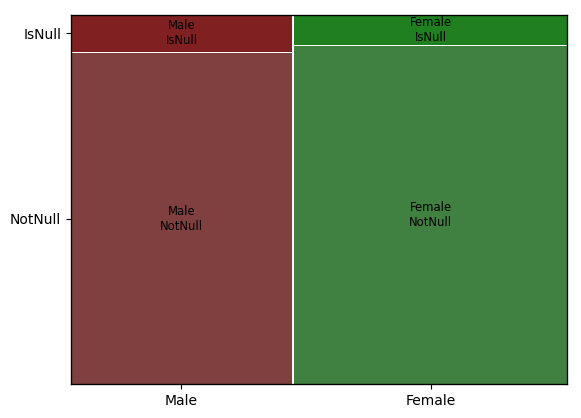

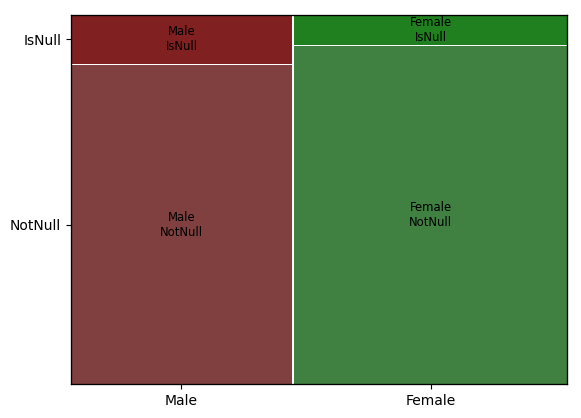

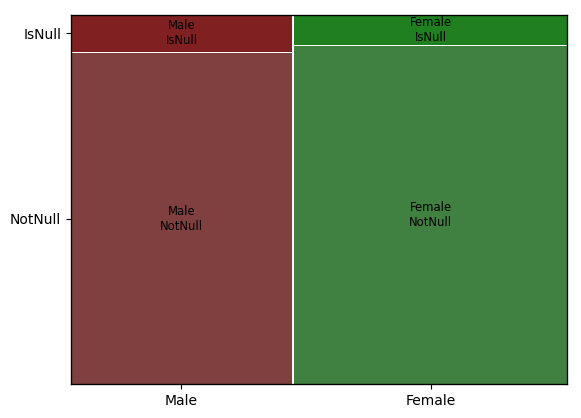

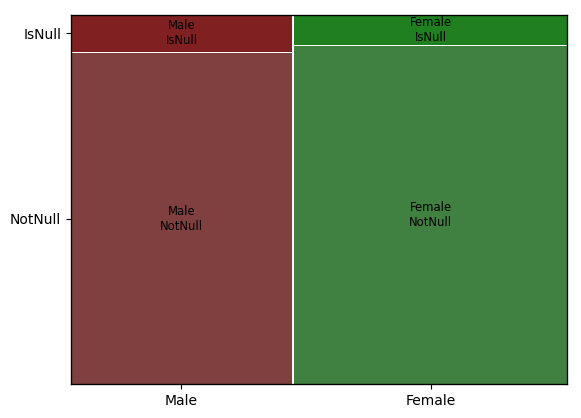

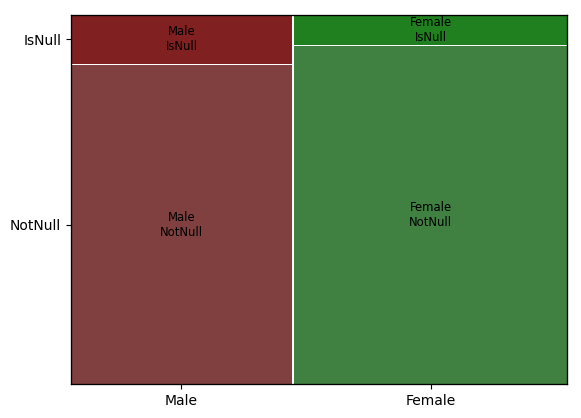

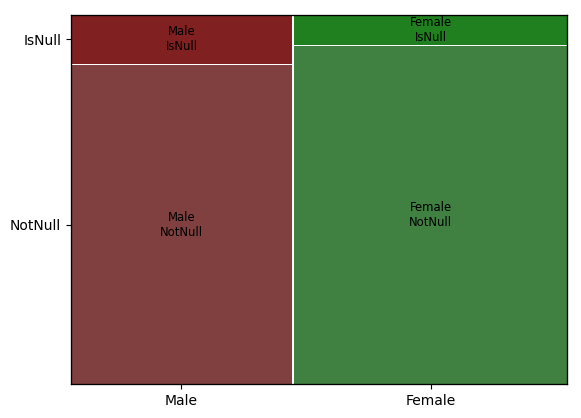

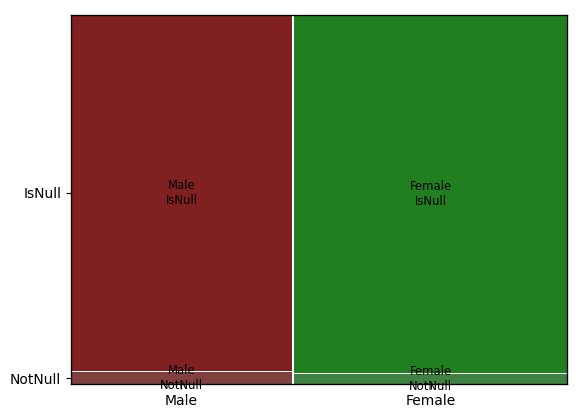

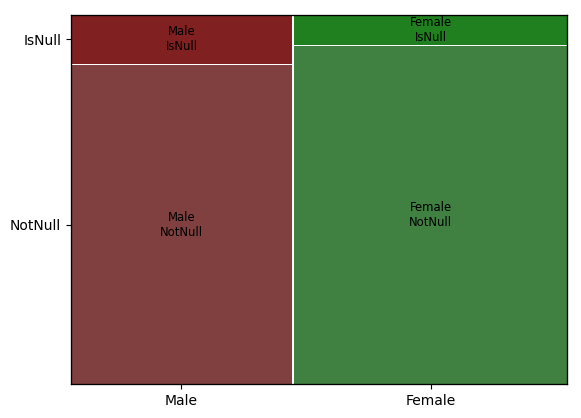

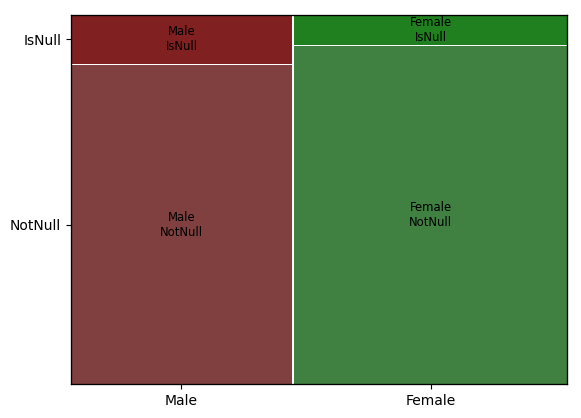

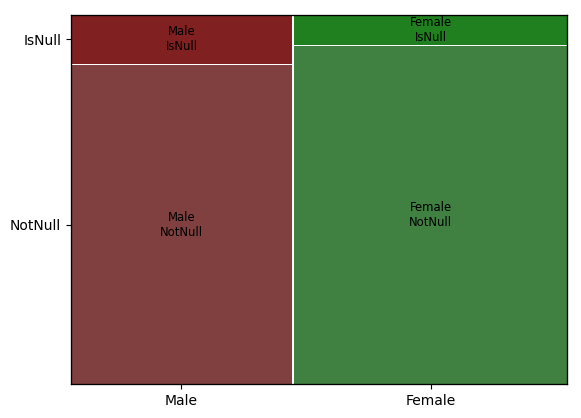

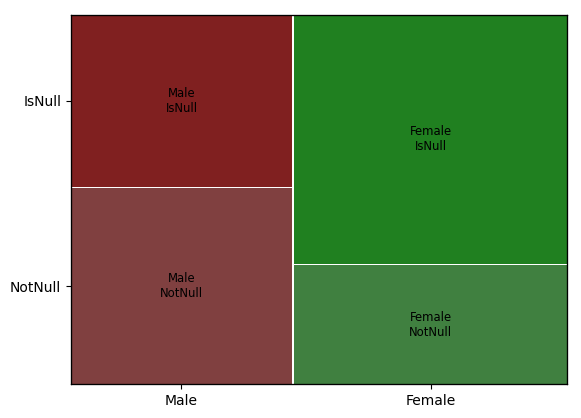

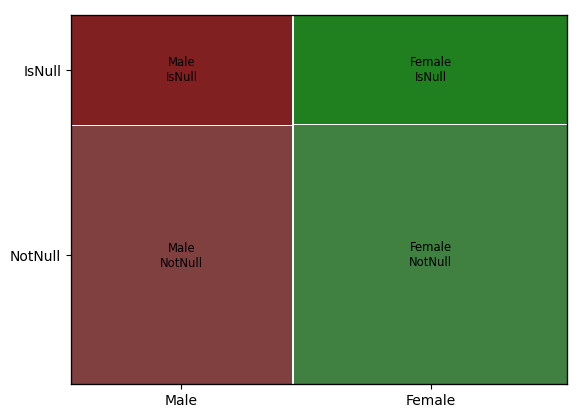

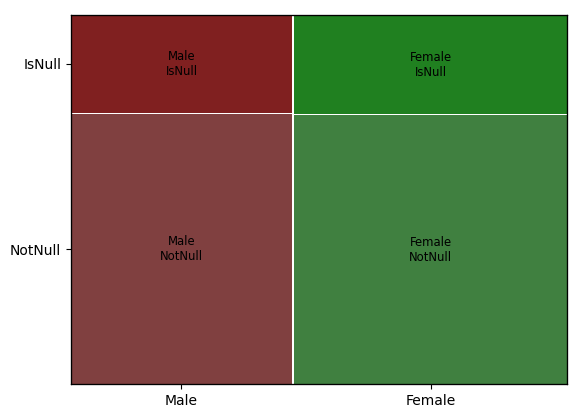

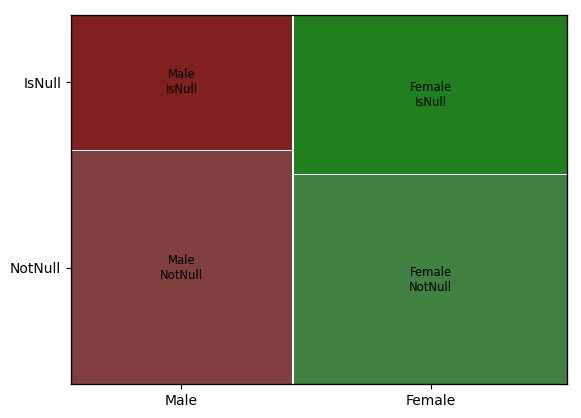

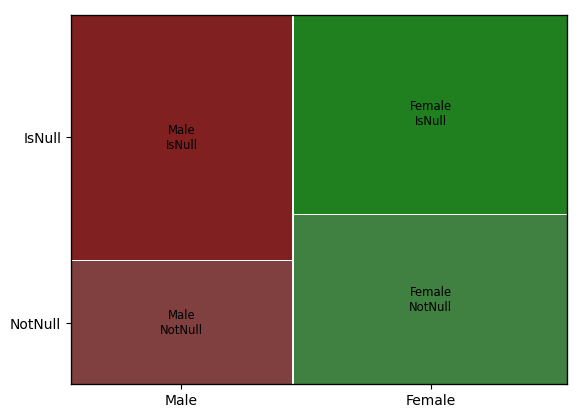

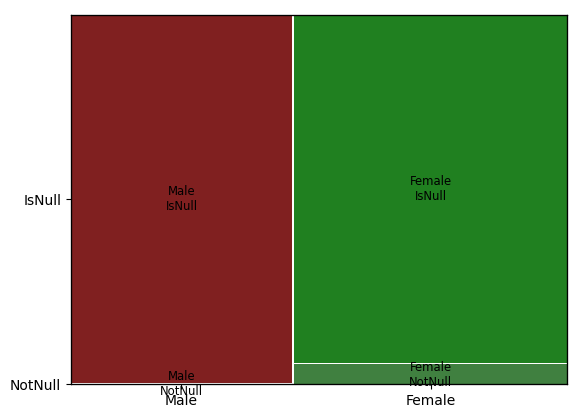

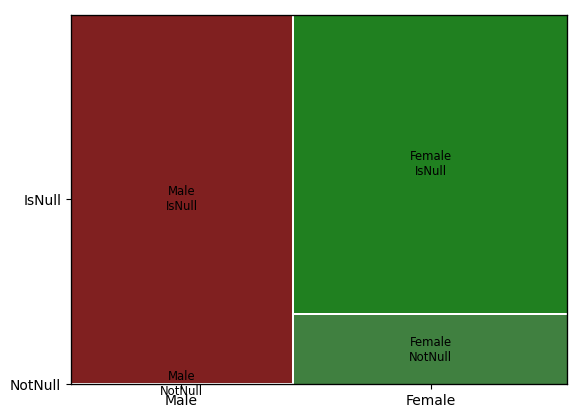

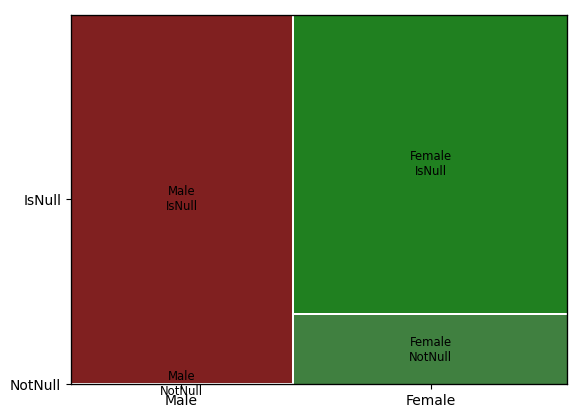

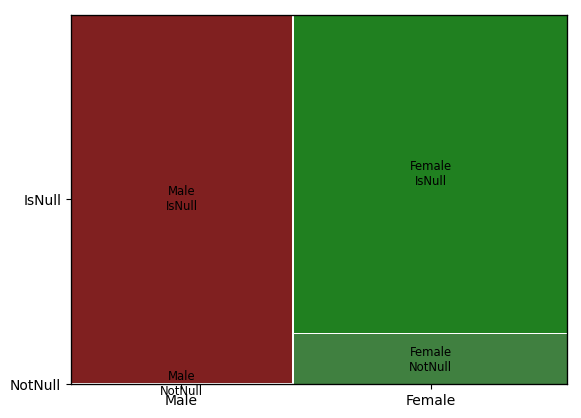

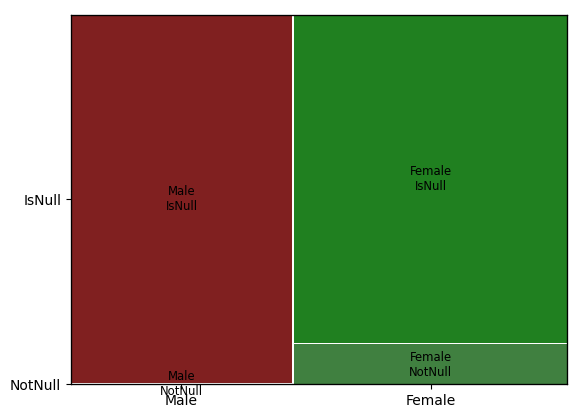

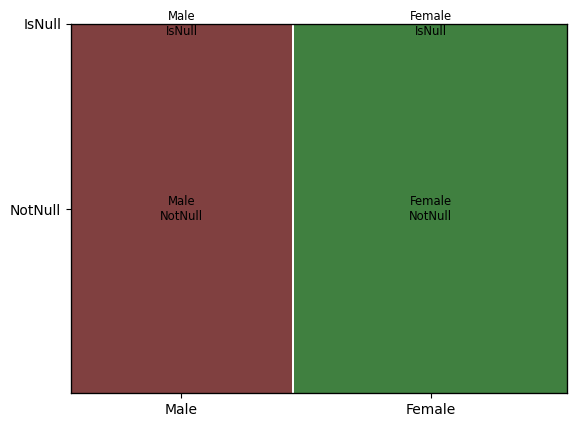

In [29]:

#  ^ Mosaic
# Ass = AllParticipantsCleanedDF
# keys = [
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherTelegramIDRevised',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfEmailAddress',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfFamilyName',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfName',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfPhoneNumber',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfTelegramID',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherTelegramID',
#     'Sex'

# ]
# KeysShort = []
# AssessInformationSharingGender = dict()
# AssessInformationSharingGender = pd.DataFrame()

# for a in keys:
# print(str(a).split(".", -1)[-1]+'MaleNotNull',
#       len(Ass[AssessTotalInformationSharingGender[a].notnull()][AssessTotalInformationSharingGender['Sex'] == 'Male']))
# print(str(a).split(".", -1)[-1]+'MaleIsNull',
#       len(AssessTotalInformationSharingGender[AssessTotalInformationSharingGender[a].isnull()][AssessTotalInformationSharingGender['Sex'] == 'Male']))
# print(str(a).split(".", -1)[-1]+'FemaleNotNull',
#       len(AssessTotalInformationSharingGender[AssessTotalInformationSharingGender[a].notnull()][Ass['Sex'] == 'Female']))
# print(str(a).split(".", -1)[-1]+'FemaleIsNull',
#       len(Ass[Ass[a].isnull()][Ass['Sex'] == 'Female']))
#     # print(a, Ass[Ass[a].notnull()])
#     AssessInformationSharingGender[str(a).split(".", -1)[-1]+'ByGender'] = len(Ass[Ass[a].notnull()])
# KeyName = str(a).split(".", -1)[-1]
# KeysShort.append(KeyName)
# AssessInformationSharingGender[KeyName] = pd.DataFrame()
# AssessInformationSharingGender[KeyName].at['Male', 'NotNull'] = len(
#     Ass.loc[Ass[a].notnull()].loc[Ass['Sex'] == 'Male'])
# AssessInformationSharingGender[KeyName].at['Male', 'IsNull'] = len(
#     Ass.loc[Ass[a].isnull()].loc[Ass['Sex'] == 'Male'])
# AssessInformationSharingGender[KeyName].at['Female', 'NotNull'] = len(
#     Ass.loc[Ass[a].notnull()].loc[Ass['Sex'] == 'Female'])
# AssessInformationSharingGender[KeyName].at['Female', 'IsNull'] = len(
#     Ass.loc[Ass[a].isnull()].loc[Ass['Sex'] == 'Female'])
# for a in keys:
#     print(a+'ByGender', len(Ass[Ass[a].notnull()].groupby('Sex')))
#     # print(a, Ass[Ass[a].notnull()])
#     AssessInformationSharingGender[str(a).split(".", -1)[-1]+'ByGender'] = len(Ass[Ass[a].notnull()])
# AssessInformationSharingGender
# pd.DataFrame(Ass[Ass[
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised'].notnull()].groupby('Sex').count())
# drop users329, users329
# df_dict = {('Male', 'selfNameRevisedNotNull'): 80,
#            ('Male', 'selfNameRevisedIsNull'): 50,
#            ('Female', 'selfNameRevisedNotNull'): 48,
#            ('Female', 'selfNameRevisedIsNull'): 70}
# with open("../jinja2/AssessInformationSharingGender.pickle", "wb") as f:
#     pickle.dump(AssessInformationSharingGender, f)
# with py7zr.SevenZipFile("../jinja2/AssessInformationSharingGender.7z", 'w') as archive:
#     archive.writeall("../jinja2/AssessInformationSharingGender.pickle")
# with open("../jinja2/KeysShort.pickle", "wb") as f:
#     pickle.dump(KeysShort, f)
# with py7zr.SevenZipFile("../jinja2/KeysShort.7z", 'w') as archive:
#     archive.writeall("../jinja2/KeysShort.pickle")
# os.remove("../jinja2/AssessInformationSharingGender.pickle")

# with py7zr.SevenZipFile("../jinja2/AssessInformationSharingGender.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/")
#  ! ################################
# with open("../jinja2/AssessInformationSharingGender.pickle", "rb") as f:
#     AssessInformationSharingGender = pickle.load(f)
# with py7zr.SevenZipFile("../jinja2/KeysShort.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/")
# with open("../jinja2/KeysShort.pickle", "rb") as f:
#     KeysShort = pickle.load(f)
#  ! ################################

for a in KeysShort:
    print(a+':')
    print()
    AssessInformationSharingGenderMatrix = [
        [
            AssessInformationSharingGender[a].at['Male',
                                                 'NotNull'], AssessInformationSharingGender[a].at['Female', 'NotNull']
        ],
        [
            AssessInformationSharingGender[a].at['Male',
                                                 'IsNull'], AssessInformationSharingGender[a].at['Female', 'IsNull']
        ]
    ]

    DictForMosaic = {
        ('Male', 'NotNull'): AssessInformationSharingGender[a].at['Male', 'NotNull'],
        ('Female', 'NotNull'):  AssessInformationSharingGender[a].at['Female', 'NotNull'],
        ('Male', 'IsNull'): AssessInformationSharingGender[a].at['Male', 'IsNull'],
        ('Female', 'IsNull'): AssessInformationSharingGender[a].at['Female', 'IsNull']
    }
    # print(AssessInformationSharingGender[a])
    # print(AssessInformationSharingGenderMatrix)
    # mosaic(AssessInformationSharingGender[a])
    mosaic(DictForMosaic)
    # mosaic(AssessInformationSharingGenderMatrix)
    plt.savefig(f'../img/AssessInformationSharingGender{a}.pdf')
    # plt.show()
    # odd_ratio, p_value = fisher_exact(AssessInformationSharingGenderMatrix)
    # print('odd ratio is : ' + str(odd_ratio))
    # print('p_value is : ' + str(p_value))
    # odd_ratio, p_value = fisher_exact(AssessInformationSharingGender[a])
    # print('odd ratio is : ' + str(odd_ratio))
    # print('p_value is : ' + str(p_value))
    print()
    print()
    print()
DictForMosaic


#  ! Effect and Response Variables 14 Sept 21:36 0001


In [30]:

#  ! Effect and Response Variables 14 Sept 21:36 0001
(# Ass = AllParticipantsCleanedDF
# keys = [
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherTelegramIDRevised',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfEmailAddress',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfFamilyName',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfName',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfPhoneNumber',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfTelegramID',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherTelegramID',
#     'Sex'

# ]
# KeysShort = []
# AssessInformationSharingGender = dict()
# AssessInformationSharingGender = pd.DataFrame()

# for a in keys:
# print(str(a).split(".", -1)[-1]+'MaleNotNull',
#       len(Ass[AssessTotalInformationSharingGender[a].notnull()][AssessTotalInformationSharingGender['Sex'] == 'Male']))
# print(str(a).split(".", -1)[-1]+'MaleIsNull',
#       len(AssessTotalInformationSharingGender[AssessTotalInformationSharingGender[a].isnull()][AssessTotalInformationSharingGender['Sex'] == 'Male']))
# print(str(a).split(".", -1)[-1]+'FemaleNotNull',
#       len(AssessTotalInformationSharingGender[AssessTotalInformationSharingGender[a].notnull()][Ass['Sex'] == 'Female']))
# print(str(a).split(".", -1)[-1]+'FemaleIsNull',
#       len(Ass[Ass[a].isnull()][Ass['Sex'] == 'Female']))
#     # print(a, Ass[Ass[a].notnull()])
#     AssessInformationSharingGender[str(a).split(".", -1)[-1]+'ByGender'] = len(Ass[Ass[a].notnull()])
# KeyName = str(a).split(".", -1)[-1]
# KeysShort.append(KeyName)
# AssessInformationSharingGender[KeyName] = pd.DataFrame()
# AssessInformationSharingGender[KeyName].at['Male', 'NotNull'] = len(
#     Ass.loc[Ass[a].notnull()].loc[Ass['Sex'] == 'Male'])
# AssessInformationSharingGender[KeyName].at['Male', 'IsNull'] = len(
#     Ass.loc[Ass[a].isnull()].loc[Ass['Sex'] == 'Male'])
# AssessInformationSharingGender[KeyName].at['Female', 'NotNull'] = len(
#     Ass.loc[Ass[a].notnull()].loc[Ass['Sex'] == 'Female'])
# AssessInformationSharingGender[KeyName].at['Female', 'IsNull'] = len(
#     Ass.loc[Ass[a].isnull()].loc[Ass['Sex'] == 'Female'])
# for a in keys:
#     print(a+'ByGender', len(Ass[Ass[a].notnull()].groupby('Sex')))
#     # print(a, Ass[Ass[a].notnull()])
#     AssessInformationSharingGender[str(a).split(".", -1)[-1]+'ByGender'] = len(Ass[Ass[a].notnull()])
# AssessInformationSharingGender
# pd.DataFrame(Ass[Ass[
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised'].notnull()].groupby('Sex').count())
# drop users329, users329
# df_dict = {('Male', 'selfNameRevisedNotNull'): 80,
#            ('Male', 'selfNameRevisedIsNull'): 50,
#            ('Female', 'selfNameRevisedNotNull'): 48,
#            ('Female', 'selfNameRevisedIsNull'): 70}
# with open("../jinja2/AssessInformationSharingGender.pickle", "wb") as f:
#     pickle.dump(AssessInformationSharingGender, f)
# with py7zr.SevenZipFile("../jinja2/AssessInformationSharingGender.7z", 'w') as archive:
#     archive.writeall("../jinja2/AssessInformationSharingGender.pickle")
# with open("../jinja2/KeysShort.pickle", "wb") as f:
#     pickle.dump(KeysShort, f)
# with py7zr.SevenZipFile("../jinja2/KeysShort.7z", 'w') as archive:
#     archive.writeall("../jinja2/KeysShort.pickle")
# os.remove("../jinja2/AssessInformationSharingGender.pickle")

# with py7zr.SevenZipFile("../jinja2/AssessInformationSharingGender.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/")
#  ! ################################
# with open("../jinja2/AssessInformationSharingGender.pickle", "rb") as f:
#     AssessInformationSharingGender = pickle.load(f)
# with py7zr.SevenZipFile("../jinja2/KeysShort.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/")
# with open("../jinja2/KeysShort.pickle", "rb") as f:
#     KeysShort = pickle.load(f)
#  ! ################################
# capital
# for a in KeysShort:
#     print(a+':')
#     print()
#     DictForMosaic = {
#         ('Male', 'NotNull'): AssessInformationSharingGender[a].at['Male', 'NotNull'],
#         ('Female', 'NotNull'):  AssessInformationSharingGender[a].at['Female', 'NotNull'],
#         ('Male', 'IsNull'): AssessInformationSharingGender[a].at['Male', 'IsNull'],
#         ('Female', 'IsNull'): AssessInformationSharingGender[a].at['Female', 'IsNull']
#     }
#     # print(AssessInformationSharingGender[a])
#     # print(AssessInformationSharingGenderMatrix)
#     # mosaic(AssessInformationSharingGender[a])
#     mosaic(DictForMosaic)
#     # mosaic(AssessInformationSharingGenderMatrix)
#     plt.savefig(f'../img/AssessInformationSharingGender{a}.pdf')
#     # plt.show()
#     # odd_ratio, p_value = fisher_exact(AssessInformationSharingGenderMatrix)
#     # print('odd ratio is : ' + str(odd_ratio))
#     # print('p_value is : ' + str(p_value))
#     # odd_ratio, p_value = fisher_exact(AssessInformationSharingGender[a])
#     # print('odd ratio is : ' + str(odd_ratio))
#     # print('p_value is : ' + str(p_value))
#     # print()
#     # print()
#     # print()
#  ! ################################
)

EffectAndResponseKeys = ['id',
                         'LandingPage.submittime',
                         'Assessment.Assessment.ExperimentGroup.0',
                         'Assessment.Assessment.ReceiveOtherResultsRequest',
                         'Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
                         'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherTelegramIDRevised',
                         'Assessment.Assessment.selfEmailAddressRevised',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.AuctionsAgreement',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.CityName',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.EducationQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.InformationQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.JobSatisfaction',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.JobTitle',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MajorForEducation',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MajorNameForOther',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MentalHealthQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.MoneyQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.RelationshipStatus',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.SaftyInLifeQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.SexLifeQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.TotalQualityOfLife',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.UniversityName',
                         'InterventionQuestionnaire.InterventionQuestionnaireData.ّImportanceOfScience',
                         'SVOSliderTest.svo',
                         'SVOSliderTest.type',
                         'SVOSliderTest.isConsistent',
                         'SVOSliderTest.selfTotal',
                         'SVOSliderTest.otherTotal',
                         'darktriad.darktriadsurvey.DTriad01Mac01',
                         'darktriad.darktriadsurvey.DTriad02Mac02',
                         'darktriad.darktriadsurvey.DTriad03Mac03',
                         'darktriad.darktriadsurvey.DTriad04Mac04',
                         'darktriad.darktriadsurvey.DTriad05Psy01',
                         'darktriad.darktriadsurvey.DTriad06Psy02',
                         'darktriad.darktriadsurvey.DTriad07Psy03',
                         'darktriad.darktriadsurvey.DTriad08Psy04',
                         'darktriad.darktriadsurvey.DTriad09Nars01',
                         'darktriad.darktriadsurvey.DTriad10Nars02',
                         'darktriad.darktriadsurvey.DTriad11Nars03',
                         'darktriad.darktriadsurvey.DTriad12Nars04',
                         'darktriad.darktriadsurvey.DataScieneFamiliarity',
                         'darktriad.QuestionsOrder.0',
                         'darktriad.QuestionsOrder.1',
                         'darktriad.QuestionsOrder.10',
                         'darktriad.QuestionsOrder.11',
                         'darktriad.QuestionsOrder.2',
                         'darktriad.QuestionsOrder.3',
                         'darktriad.QuestionsOrder.4',
                         'darktriad.QuestionsOrder.5',
                         'darktriad.QuestionsOrder.6',
                         'darktriad.QuestionsOrder.7',
                         'darktriad.QuestionsOrder.8',
                         'darktriad.QuestionsOrder.9',
                         'darktriad.isReversed',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidCareerRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidFreedomRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPhysicalPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidProsecutionRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidPsychologicalPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidResourceRelatedPrivacy02',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy01',
                         'willingnessToPayOthers.willingnessToPayOthersData.AGMPBidSocialPrivacy02',
                         'willingnessToPayOthers.attitudeGroupName',
                         'willingnessToPayOthers.attitudeisReversed',
                         'willingnessToPayOthers.normGroupName',
                         'willingnessToPayOthers.normisReversed',
                         'willingnessToPayOthers.attitudeValueQuestionsOrder.0',
                         'willingnessToPayOthers.attitudeValueQuestionsOrder.1',
                         'willingnessToPayOthers.attitudeValueQuestionsOrder.2',
                         'willingnessToPayOthers.attitudeValueQuestionsOrder.3',
                         'willingnessToPayOthers.attitudeValueQuestionsOrder.4',
                         'willingnessToPayOthers.attitudeValueQuestionsOrder.5',
                         'willingnessToPayOthers.attitudeValueQuestionsOrder.6',
                         'willingnessToPayOthers.attitudeValueQuestionsOrder.7',
                         'willingnessToPayOthers.normValueQuestionsOrder.0',
                         'willingnessToPayOthers.normValueQuestionsOrder.1',
                         'willingnessToPayOthers.normValueQuestionsOrder.2',
                         'willingnessToPayOthers.normValueQuestionsOrder.3',
                         'willingnessToPayOthers.normValueQuestionsOrder.4',
                         'willingnessToPayOthers.normValueQuestionsOrder.5',
                         'willingnessToPayOthers.normValueQuestionsOrder.6',
                         'willingnessToPayOthers.normValueQuestionsOrder.7',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-Attitude',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-AttitudeImportance',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-BehaviorQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IdentificationwiththeReferent',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-IntentionQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-PerceivedBehavioralControlQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestion',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionContext',
                         'TPBQuestionnaire.TPBQuestionnaireData.TPBQuestionnaire-SubjectiveNormQuestionExpert',
                         'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfEmailAddress',
                         'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfFamilyName',
                         'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfName',
                         'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfPhoneNumber',
                         'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfTelegramID',
                         'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress',
                         'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
                         'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
                         'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
                         'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherTelegramID'
                         ]
EffectResponseDF = experiment.copy()
DisclosureDataKeys = [
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherTelegramIDRevised',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfEmailAddress',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfFamilyName',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfName',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfPhoneNumber',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfTelegramID',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherTelegramID',
]
DisclosureDataKeysShort = []
# AssessInformationSharingGender = dict()
# AssessInformationSharingGender = pd.DataFrame()

for a in DisclosureDataKeys:
    KeyName = str(a).split(".", -1)[-1]
    DisclosureDataKeysShort.append(KeyName)
# EffectResponseDF['otherFamilyNameRevised'] = pd.concat(EffectResponseDF.loc['otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName'],
# EffectResponseDF.loc['Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised'])
OtherPreTest = [
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber'
]
OtherPostTest = [
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
]
EffectiveVariables = ['NullNull', 'NullX',
                      'XNull', 'XX', 'XY', 'Unknown', 'TheAnswerIsNo']


def EffectResponseFunction(PreTest, PostTest):
    if all([PreTest == PostTest, PreTest == np.nan, PostTest == np.nan]):
        return 'NullNull'
    # elif PreTest == PostTest != np.nan:
    elif all([PreTest == PostTest, PreTest != np.nan, PostTest != np.nan]):
        return 'XX'
    # elif PreTest != PostTest == np.nan:
    elif all([PreTest != PostTest, PreTest != np.nan, PostTest == np.nan]):
        return 'XNull'
    # elif np.nan == PreTest != PostTest:
    elif all([PreTest != PostTest, PreTest == np.nan, PostTest != np.nan]):
        return 'NullX'
    # elif np.nan != PreTest != PostTest != np.nan:
    elif all([PreTest != PostTest, PreTest != np.nan, PostTest != np.nan]):
        return 'XY'
    else:
        return 'Unknown'


# for Pre, Post in zip(OtherPreTest, OtherPostTest):
#     EffectResponseDF.loc[:,f'DisclosureResponse{str(Pre).split(".", -1)[-1]}'] = EffectResponseDF.apply(
#         lambda x: EffectResponseFunction(x[Pre], x[Post]), axis=1)
    # print(EffectResponseDF[f'DisclosureResponse{Pre}'])
# print(DisclosureDataKeysShort)
# for i in OtherPreTest:
#     print(f'{i}:',EffectResponseDF[f'DisclosureResponse{i}'].groupby(f'DisclosureResponse{i}'))
#  ! ################################
# with open("../jinja2/data/EffectResponseDF.pickle", "wb") as f:
#     pickle.dump(EffectResponseDF, f)
#  ! ################################
# with py7zr.SevenZipFile("../jinja2/data/EffectResponseDF.7z", 'w') as archive:
#     archive.writeall("../jinja2/data/EffectResponseDF.pickle")
# os.remove("../jinja2/data/EffectResponseDF.pickle")

# with open("../jinja2/data/EffectResponseDF.pickle", "rb") as f:
#     EffectResponseDF = pickle.load(f)
# with py7zr.SevenZipFile("../jinja2/data/EffectResponseDF.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/data")
#  ! ################################
# with open("../jinja2/data/EffectResponseDF.pickle", "rb") as f:
#     EffectResponseDF = pickle.load(f)
#  ! ################################
# os.remove("../jinja2/data/EffectResponseDF.pickle")
# print(EffectResponseDF['DisclosureResponseotherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# print(EffectResponseDF['PIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName'])
# EffectResponseDF
EffectResponseDF
# experiment

labelsRepeated,Assessment.Assessment.ExperimentGroup.0,Assessment.Assessment.ReceiveOtherResultsRequest,Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised,...,willingnessToPayOthers.willingnessToPayOthersData.submittimeAttentionAssessmentQuestionMaxValuation,willingnessToPayOthers.willingnessToPayOthersData.submittimeAttentionAssessmentQuestionMinValuation,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBAttitudeQuestionnaireAttDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBAttitudeQuestionnaireDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBQuestionnaireDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBQuestionnaireNormDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTestQuestion01,willingnessToPayOthers.willingnessToPayOthersData.submittimeTestQuestion02,willingnessToPayOthers.willingnessToPayOthersData.submittimeattitudeTestQuestion01,willingnessToPayOthers.willingnessToPayOthersData.submittimeattitudeTestQuestion02
index,,,,,,,,,,,,,,,,,,,,,
users103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users105,CuriosityDataBenefit04,NoDontWantToGetOtherData,Shakibagh350@gmail.com,فقفوری,شکیبا,۰۹۱۰۲۰۳۳۱۱۲,@M_govahii,,,NaN,...,NaN,NaN,35,NaN,NaN,6,4,5,33,5
users106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
users345,SocietalBenefitGroup01,YesWantToGet,,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
users35,ScientificDataBenefitGroup02,YesWantToGet,alikeyhani9596@gmail.com,کیهانی,علی,۰۹۲۱۴۲۷۴۰۵۳,,,,NaN,...,NaN,NaN,14,NaN,NaN,58,47,14,6,18
users36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:

#  ! Effect and Response Variables 14 Sept 21:36 0002
# Ass = AllParticipantsCleanedDF
# keys = [
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised',
#     'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherTelegramIDRevised',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfEmailAddress',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfFamilyName',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfName',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfPhoneNumber',
#     'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfTelegramID',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
#     'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherTelegramID',
#     'Sex'

# ]
# KeysShort = []
# AssessInformationSharingGender = dict()
# AssessInformationSharingGender = pd.DataFrame()

# for a in keys:
# print(str(a).split(".", -1)[-1]+'MaleNotNull',
#       len(Ass[AssessTotalInformationSharingGender[a].notnull()][AssessTotalInformationSharingGender['Sex'] == 'Male']))
# print(str(a).split(".", -1)[-1]+'MaleIsNull',
#       len(AssessTotalInformationSharingGender[AssessTotalInformationSharingGender[a].isnull()][AssessTotalInformationSharingGender['Sex'] == 'Male']))
# print(str(a).split(".", -1)[-1]+'FemaleNotNull',
#       len(AssessTotalInformationSharingGender[AssessTotalInformationSharingGender[a].notnull()][Ass['Sex'] == 'Female']))
# print(str(a).split(".", -1)[-1]+'FemaleIsNull',
#       len(Ass[Ass[a].isnull()][Ass['Sex'] == 'Female']))
#     # print(a, Ass[Ass[a].notnull()])
#     AssessInformationSharingGender[str(a).split(".", -1)[-1]+'ByGender'] = len(Ass[Ass[a].notnull()])
# KeyName = str(a).split(".", -1)[-1]
# KeysShort.append(KeyName)
# AssessInformationSharingGender[KeyName] = pd.DataFrame()
# AssessInformationSharingGender[KeyName].at['Male', 'NotNull'] = len(
#     Ass.loc[Ass[a].notnull()].loc[Ass['Sex'] == 'Male'])
# AssessInformationSharingGender[KeyName].at['Male', 'IsNull'] = len(
#     Ass.loc[Ass[a].isnull()].loc[Ass['Sex'] == 'Male'])
# AssessInformationSharingGender[KeyName].at['Female', 'NotNull'] = len(
#     Ass.loc[Ass[a].notnull()].loc[Ass['Sex'] == 'Female'])
# AssessInformationSharingGender[KeyName].at['Female', 'IsNull'] = len(
#     Ass.loc[Ass[a].isnull()].loc[Ass['Sex'] == 'Female'])
# for a in keys:
#     print(a+'ByGender', len(Ass[Ass[a].notnull()].groupby('Sex')))
#     # print(a, Ass[Ass[a].notnull()])
#     AssessInformationSharingGender[str(a).split(".", -1)[-1]+'ByGender'] = len(Ass[Ass[a].notnull()])
# AssessInformationSharingGender
# pd.DataFrame(Ass[Ass[
#     'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised'].notnull()].groupby('Sex').count())
# drop users329, users329
# df_dict = {('Male', 'selfNameRevisedNotNull'): 80,
#            ('Male', 'selfNameRevisedIsNull'): 50,
#            ('Female', 'selfNameRevisedNotNull'): 48,
#            ('Female', 'selfNameRevisedIsNull'): 70}
# with open("../jinja2/AssessInformationSharingGender.pickle", "wb") as f:
#     pickle.dump(AssessInformationSharingGender, f)
# with py7zr.SevenZipFile("../jinja2/AssessInformationSharingGender.7z", 'w') as archive:
#     archive.writeall("../jinja2/AssessInformationSharingGender.pickle")
# with open("../jinja2/KeysShort.pickle", "wb") as f:
#     pickle.dump(KeysShort, f)
# with py7zr.SevenZipFile("../jinja2/KeysShort.7z", 'w') as archive:
#     archive.writeall("../jinja2/KeysShort.pickle")
# os.remove("../jinja2/AssessInformationSharingGender.pickle")

# with py7zr.SevenZipFile("../jinja2/AssessInformationSharingGender.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/")
#  ! ################################
# with open("../jinja2/AssessInformationSharingGender.pickle", "rb") as f:
#     AssessInformationSharingGender = pickle.load(f)
# with py7zr.SevenZipFile("../jinja2/KeysShort.7z", 'r') as archive:
#     archive.extractall(path="../jinja2/")
# with open("../jinja2/KeysShort.pickle", "rb") as f:
#     KeysShort = pickle.load(f)
#  ! ################################
# capital
# for a in KeysShort:
#     print(a+':')
#     print()
#     DictForMosaic = {
#         ('Male', 'NotNull'): AssessInformationSharingGender[a].at['Male', 'NotNull'],
#         ('Female', 'NotNull'):  AssessInformationSharingGender[a].at['Female', 'NotNull'],
#         ('Male', 'IsNull'): AssessInformationSharingGender[a].at['Male', 'IsNull'],
#         ('Female', 'IsNull'): AssessInformationSharingGender[a].at['Female', 'IsNull']
#     }
#     # print(AssessInformationSharingGender[a])
#     # print(AssessInformationSharingGenderMatrix)
#     # mosaic(AssessInformationSharingGender[a])
#     mosaic(DictForMosaic)
#     # mosaic(AssessInformationSharingGenderMatrix)
#     plt.savefig(f'../img/AssessInformationSharingGender{a}.pdf')
#     # plt.show()
#     # odd_ratio, p_value = fisher_exact(AssessInformationSharingGenderMatrix)
#     # print('odd ratio is : ' + str(odd_ratio))
#     # print('p_value is : ' + str(p_value))
#     # odd_ratio, p_value = fisher_exact(AssessInformationSharingGender[a])
#     # print('odd ratio is : ' + str(odd_ratio))
#     # print('p_value is : ' + str(p_value))
#     # print()
#     # print()
#     # print()
#  ! ################################


PreTestSelfRevisedKeys = ['selfNameRevised',
                          'selfFamilyNameRevised',
                          'selfPhoneNumberRevised',
                          'selfEmailAddressRevised',
                          'selfTelegramIDRevised']
PreTestOtherRevisedKeys = ['otherNameRevised',
                           'otherFamilynameRevised',
                           'otherPhoneNumberRevised',
                           'otherEmailAddressRevised',
                           'otherTelegramIDRevised']

PreTestOtherKeys = ['selfEmailAddress',
                    'selfFamilyName',
                    'selfName',
                    'selfPhoneNumber',
                    'selfTelegramID']

PreTestOtherKeys = ['otherEmailAddress',
                    'otherFamilyName',
                    'otherName',
                    'otherPhoneNumber',
                    'otherTelegramID']
ResponseVariables = []
EffectVariables = ['Sex']


In [32]:
Ass[Ass['Assessment.Assessment.selfEmailAddressRevised'].notnull()]

# DropIndexName = Ass[Ass['Assessment.Assessment.selfEmailAddressRevised'].notnull()].index
# DropIndexName = CleandDataDF[CleandDataDF['Age'] == '17'].index
# DropIndexName
# Ass.drop(DropIndexName, axis=0, inplace=True)


labelsRepeated,Assessment.Assessment.ExperimentGroup.0,Assessment.Assessment.ReceiveOtherResultsRequest,Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised,Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilyNameRevised,Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised,...,willingnessToPayOthers.willingnessToPayOthersData.submittimeAttentionAssessmentQuestionMaxValuation,willingnessToPayOthers.willingnessToPayOthersData.submittimeAttentionAssessmentQuestionMinValuation,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBAttitudeQuestionnaireAttDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBAttitudeQuestionnaireDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBQuestionnaireDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTPBQuestionnaireNormDesc,willingnessToPayOthers.willingnessToPayOthersData.submittimeTestQuestion01,willingnessToPayOthers.willingnessToPayOthersData.submittimeTestQuestion02,willingnessToPayOthers.willingnessToPayOthersData.submittimeattitudeTestQuestion01,willingnessToPayOthers.willingnessToPayOthersData.submittimeattitudeTestQuestion02
index,,,,,,,,,,,,,,,,,,,,,
users345,SocietalBenefitGroup01,YesWantToGet,,,,,,,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
AllParticipantsCleanedDF = AllParticipantsCleanedDFCopy
CleandDataDF = AllParticipantsCleanedDF
replacements = [
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfFamilyNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfPhoneNumberRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfEmailAddressRevised',
    'Assessment.Assessment.selfEmailAddressRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformation.selfTelegramIDRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherNameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherFamilynameRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherPhoneNumberRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherEmailAddressRevised',
    'Assessment.Assessment.SelfANDOtherPIIInformationOther.otherTelegramIDRevised',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfEmailAddress',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfFamilyName',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfName',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfPhoneNumber',
    'selfPIIDisclosure.selfPIIDisclosureData.selfPIIDisclosureMultiText.selfTelegramID',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherEmailAddress',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherFamilyName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherName',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherPhoneNumber',
    'otherPIIDisClosure.otherPIIDisClosureData.otherPIIDisClosureMultiText.otherTelegramID',
]
substitutes = [
    'selfNameRevised',
    'selfFamilyNameRevised',
    'selfPhoneNumberRevised',
    'selfEmailAddressRevised1',
    'selfEmailAddressRevised2',
    'selfTelegramIDRevised',
    'otherNameRevised',
    'otherFamilynameRevised',
    'otherPhoneNumberRevised',
    'otherEmailRevised',
    'otherTelegramIDRevised',
    'selfEmailAddress',
    'selfFamilyName',
    'selfName',
    'selfPhoneNumber',
    'selfTelegramID',
    'otherEmailAddress',
    'otherFamilyName',
    'otherName',
    'otherPhoneNumber',
    'otherTelegramID',
]
CleandDataDF.rename(
    columns={'SVOSliderTest.type': 'SVO type'}, inplace=True)
CleandDataDF.rename(
    columns={'SVOSliderTest.svo': 'SVO Score'}, inplace=True)
CleandDataDF.rename(columns={
    'InterventionQuestionnaire.InterventionQuestionnaireData.SexQuestion': 'Sex'}, inplace=True)
CleandDataDF.rename(columns={
    'InterventionQuestionnaire.InterventionQuestionnaireData.AgeQuestion': 'Age'}, inplace=True)
col_list = [
    'darktriad.darktriadsurvey.DTriad01Mac01',

    'darktriad.darktriadsurvey.DTriad02Mac02',

    'darktriad.darktriadsurvey.DTriad03Mac03',

    'darktriad.darktriadsurvey.DTriad04Mac04',

    'darktriad.darktriadsurvey.DTriad05Psy01',

    'darktriad.darktriadsurvey.DTriad06Psy02',

    'darktriad.darktriadsurvey.DTriad07Psy03',

    'darktriad.darktriadsurvey.DTriad08Psy04',

    'darktriad.darktriadsurvey.DTriad09Nars01',

    'darktriad.darktriadsurvey.DTriad10Nars02',

    'darktriad.darktriadsurvey.DTriad11Nars03',

    'darktriad.darktriadsurvey.DTriad12Nars04']

CleandDataDF['Dark Triad Score'] = CleandDataDF[col_list].dropna().astype(
    float).sum(axis=1)
CleandDataDF['Dark Triad Score']

SVOScore = CleandDataDF['SVO Score'].dropna()
DarkTriadScore = CleandDataDF['Dark Triad Score'].dropna()
DarkTriadScore
SVOAndDTRNaNDroped = pd.concat([SVOScore, DarkTriadScore], axis=1)



In [34]:

DropIndexName = CleandDataDF[CleandDataDF['Age'] == '67'].index
# DropIndexName = CleandDataDF[CleandDataDF['Age'] == '17'].index
# DropIndexName
CleandDataDF.drop(DropIndexName, axis=0, inplace=True)
# CleandDataDF.drop(DropIndexName, axis=0, inplace=True)
# CleandDataDF[(CleandDataDF['Age']).astype(int)>20]
# for a in range(17,57):
#     print(a, CleandDataDF[CleandDataDF['Age'] == str(a)][CleandDataDF['selfFamilyName'].notnull()]['selfFamilyName'])
# # next
# (CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfFamilyName'].notnull()]
#           [CleandDataDF['selfName'].notnull()]
#           [CleandDataDF['selfPhoneNumber'].notnull()]['selfFamilyName'])

# (CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherFamilyName'].notnull()]
#           [CleandDataDF['otherName'].notnull()]
#           [CleandDataDF['otherPhoneNumber'].notnull()]['otherFamilyName'])

# print('selfEmailAddress',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfEmailAddressRevised1'].notnull()]))
# # ! ########################
# print('selfFamilyNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfFamilyNameRevised'].notnull()]))
# print('selfNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfNameRevised'].notnull()]))
# print('selfPhoneNumberRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfPhoneNumberRevised'].notnull()]))
# print('selfTelegramIDRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['selfTelegramIDRevised'].notnull()]))
# # print('otherFamilyNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherFamilyNameRevised'].notnull()]))
# print('otherNameRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherNameRevised'].notnull()]))
# print('otherPhoneNumberRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherPhoneNumberRevised'].notnull()]))
# # print('otherEmailAddressRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherEmailAddressRevised'].notnull()]))
# print('otherTelegramIDRevised',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherTelegramIDRevised'].notnull()]))

# # ! ########################
# print('otherEmailAddress',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherEmailAddress'].notnull()]))
# print('otherFamilyName',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherFamilyName'].notnull()]))
# print('otherName',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherName'].notnull()]))
# print('otherPhoneNumber',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherPhoneNumber'].notnull()]))
# print('otherTelegramID',len(CleandDataDF[CleandDataDF['Age'] != None][CleandDataDF['otherTelegramID'].notnull()]))
# selfTelegramIDRevised
# otherEmailAddressRevised
# selfEmailAddressRevised1
# selfEmailAddressRevised2

In [35]:
# rank some or t-test 

In [36]:
#error bar

In [37]:
#ficsher exact

In [38]:


latex_jinja_env = jinja2.Environment(
    block_start_string='\BLOCK{',
    block_end_string='}',
    variable_start_string='\VAR{',
    variable_end_string='}',
    comment_start_string='\#{',
    comment_end_string='}',
    line_statement_prefix='%%',
    line_comment_prefix='%#',
    trim_blocks=True,
    autoescape=False,
    loader=jinja2.FileSystemLoader(os.path.abspath('.'))
)
Variables = {1: {'variableName': 'InitialSampleSize', 'variableValue': InitialSampleSize},
             2: {'variableName': 'SampleSizeMale', 'variableValue': SampleSizeMale},
             3: {'variableName': 'SampleSizeFemale', 'variableValue': SampleSizeFemale},
             4: {'variableName': 'sampleAgeMeanMale', 'variableValue': sampleAgeMeanMale},
             5: {'variableName': 'sampleAgeSDFemale', 'variableValue': sampleAgeSDFemale},
             5: {'variableName': 'sampleAgeSDMale', 'variableValue': sampleAgeSDMale},
             5: {'variableName': 'sampleAgeSD', 'variableValue': sampleAgeSD},
             6: {'variableName': 'ageMax', 'variableValue': ageMax},
             7: {'variableName': 'ageMin', 'variableValue': ageMin},
             8: {'variableName': 'ageMaxMale', 'variableValue': ageMaxMale},
             9: {'variableName': 'ageMinFemale', 'variableValue': ageMinFemale},
             10: {'variableName': 'CleanedSampleSize', 'variableValue': CleanedSampleSize},
             11: {'variableName': 'sampleAgeMean', 'variableValue': sampleAgeMean},
             12: {'variableName': 'noOfIndividualisticParticipants', 'variableValue': noOfIndividualisticParticipants},
             13: {'variableName': 'noOfCompetitiveParticipants', 'variableValue': noOfCompetitiveParticipants},
             14: {'variableName': 'noOfCooperativeParticipants', 'variableValue': noOfProsocialParticipants},
             15: {'variableName': 'noOfAltruisticParticipants', 'variableValue': noOfAltruisticParticipants},
             16: {'variableName': 'meanOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': meanOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             17: {'variableName': 'SDOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': SDOfSelfWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             18: {'variableName': 'meanOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': meanOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             19: {'variableName': 'SDOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection', 'variableValue': SDOfOtherWTPAllTwoParticipantGroupsAllTwoQuestionSection},
             20: {'variableName': 'PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation',
                  'variableValue': PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation},
             21: {'variableName': 'PiersonrValueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation',
                  'variableValue': PiersonrValueForCorrelationBetweenFirstAndSecondPartOfQuestionsForSelfValuation},
             22: {'variableName': 'PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForOtherValuation',
                  'variableValue': PvalueForCorrelationBetweenFirstAndSecondPartOfQuestionsForOtherValuation},
             23: {'variableName': 'PiersonRValueForCorrelationBetweenFirstAndSecondPartOfQuestionsforOtherValuation',
                  'variableValue': PiersonRValueForCorrelationBetweenFirstAndSecondPartOfQuestionsforOtherValuation},
             24: {'variableName': 'meanOfSelfWTPAllTwoParticipantGroupFirstQuestionSection',
                  'variableValue': meanOfSelfWTPAllTwoParticipantGroupFirstQuestionSection},
             25: {'variableName': 'SDOfSelfWTPAllTwoParticipantGroupsFirstQuestionSection',
                  'variableValue': SDOfSelfWTPAllTwoParticipantGroupsFirstQuestionSection},
             26: {'variableName': 'meanOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection',
                  'variableValue': meanOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection},
             27: {'variableName': 'SDOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection',
                  'variableValue': SDOfOtherWTPAllTwoParticipantGroupsSecondQuestionSection},
             28: {'variableName': 'SampleSizeSexualityNoAnswer',
                  'variableValue': SampleSizeSexualityNoAnswer}
             }


In [39]:
template = latex_jinja_env.get_template('./jinja-template.tex')
outputTexVariables = template.render(
    Variables=Variables,  numebrOfVariables=len(Variables))
print(outputTexVariables)
with open("../tex/variables.tex", "w") as output:
    output.write(outputTexVariables)





 % ^ InitialSampleSize =  189 
\newcommand{
    \InitialSampleSize
}[0]{189\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ SampleSizeMale =  30 
\newcommand{
    \SampleSizeMale
}[0]{30\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ SampleSizeFemale =  37 
\newcommand{
    \SampleSizeFemale
}[0]{37\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ sampleAgeMeanMale =  24.8 
\newcommand{
    \sampleAgeMeanMale
}[0]{24.8\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ sampleAgeSD =  9.17 
\newcommand{
    \sampleAgeSD
}[0]{9.17\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ ageMax =  67 
\newcommand{
    \ageMax
}[0]{67\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ ageMin =  16 
\newcommand{
    \ageMin
}[0]{16\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ ageMaxMale =  41 
\newcommand{
    \ageMaxMale
}[0]{41\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
 % ^ ageMinFemale =  16 
\newcommand{
    \ageMinFemale
}[0]{16\,}
 % ^ %%%%%%%%%%%%%%%%%%%%%%%%%

In [40]:


reshaper = arabic_reshaper.ArabicReshaper(
    arabic_reshaper.config_for_true_type_font(
        '../font/IRTitr.ttf',
        arabic_reshaper.ENABLE_ALL_LIGATURES
    )
)


Text(0.5, 1.0, 'ﺖﯿﺴﻨﺟ')

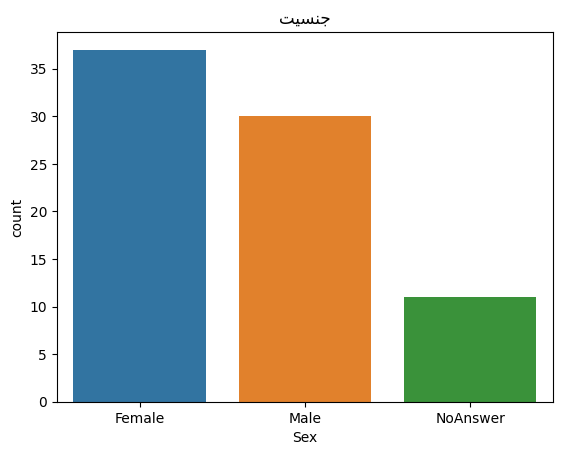

In [41]:
PlotDF = AllParticipantsCleanedDF


SexualityFigPersianTitle = 'جنسیت'
# SexualityFigPersianTitlereshaped_text = arabic_reshaper.reshape(SexualityFigPersianTitle)
SexualityFigPersianTitlereshaped_text = reshaper.reshape(SexualityFigPersianTitle)
SexualityFigPersianTitlebidi_text = get_display(SexualityFigPersianTitlereshaped_text)

# SexualityPlt = 
sns.countplot(x='Sex',data=PlotDF)
plt.title(SexualityFigPersianTitlebidi_text,fontsize=12)


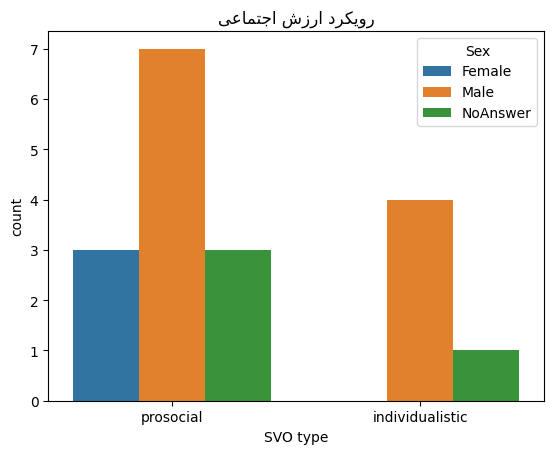

In [42]:
plt.savefig('../img/sexualityAgainstPopulation.pdf')
SexualitySVOFigPersianTitle = 'رویکرد ارزش اجتماعی'
SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(SexualitySVOFigPersianTitle)
SexualitySVOFigPersianTitlebidi_text = get_display(SexualitySVOFigPersianTitleTitlereshaped_text)
plt.title(SexualitySVOFigPersianTitlebidi_text,fontsize=12)
sns.countplot(x='SVO type',hue='Sex',data=PlotDF)

plt.savefig('../img/sexualityAndSVOAgainstPopulation.pdf')


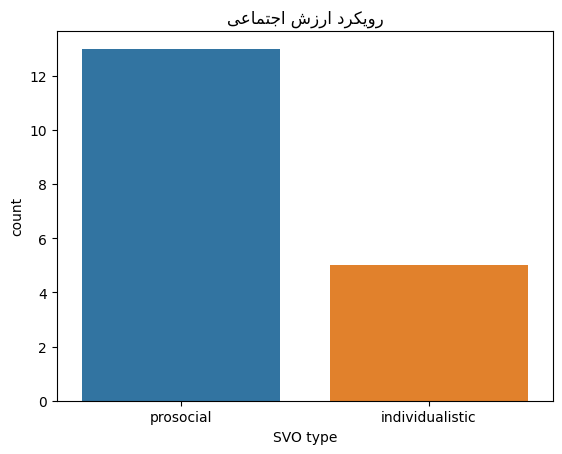

In [43]:
# PlotDF.rename(columns = {'SVOSliderTest.type':'SVO type'}, inplace = True)
SexualitySVOFigPersianTitle = 'رویکرد ارزش اجتماعی'
SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
    SexualitySVOFigPersianTitle)
SexualitySVOFigPersianTitlebidi_text = get_display(
    SexualitySVOFigPersianTitleTitlereshaped_text)
plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)

var01_1 = 'فراوانی'
var01_2 = arabic_reshaper.reshape(var01_1)
var01_3 = get_display(var01_2)
var02_1 = 'جامعه‌پسند'
var02_2 = arabic_reshaper.reshape(var02_1)
var02_3 = get_display(var02_2)
var03_1 = 'فردگرا'
var03_2 = arabic_reshaper.reshape(var03_1)
var03_3 = get_display(var03_2)

var04_1 = 'فردگرا'
var04_2 = arabic_reshaper.reshape(var04_1)
var04_3 = get_display(var04_2)

var05_1 = 'دیگرخواه'
var05_2 = arabic_reshaper.reshape(var05_1)
var05_3 = get_display(var05_2)



ax = sns.countplot(x='SVO type', data=PlotDF)
# ax.set(xticks=range(len(PlotDF['SVO type'])), xticklabels=[1])
# ax.set(xticklabels=[var02_3,var03_3,var04_3,var05_3])
# ax.set(xticklabels=[var02_3,var03_3])
# ax.set(ylabel=var01_3)
# ax.set(xticks=[0,1,2,3])

plt.savefig('../img/SVOAgainstPopulation.pdf')


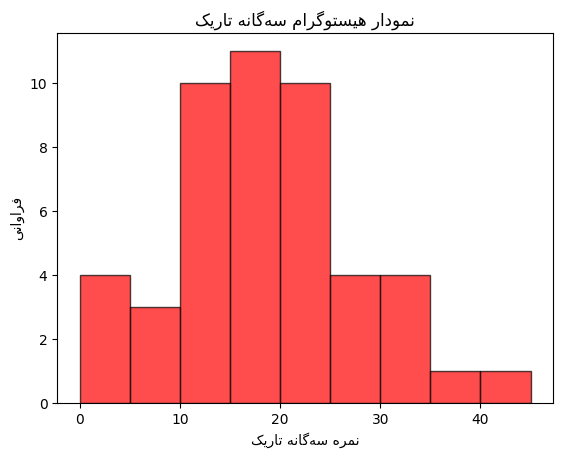

In [44]:
# PlotDF.rename(columns = {'SVOSliderTest.type':'SVO type'}, inplace = True)
SexualitySVOFigPersianTitle = 'نمودار هیستوگرام سه‌گانه تاریک'
SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(SexualitySVOFigPersianTitle)
SexualitySVOFigPersianTitlebidi_text = get_display(SexualitySVOFigPersianTitleTitlereshaped_text)
var02_1 = 'نمره سه‌گانه تاریک'
var02_2 = arabic_reshaper.reshape(var02_1)
var02_3 = get_display(var02_2)
var03_1 = 'فراوانی'
var03_2 = arabic_reshaper.reshape(var03_1)
var03_3 = get_display(var03_2)

plt.title(SexualitySVOFigPersianTitlebidi_text,fontsize=12)
bins = list(range(0,50,5))
plt.hist((AllParticipantsCleanedDF['Dark Triad Score'].dropna()), bins, facecolor='r', alpha=0.7, edgecolor='k', linewidth=1)

# plt.xlabel("Dark Triad Score")
plt.xlabel(var02_3)
plt.ylabel(var03_3)
# sns.countplot(x='Dark Triad Score',data=PlotDF)

plt.savefig('../img/SexToDTR.pdf')



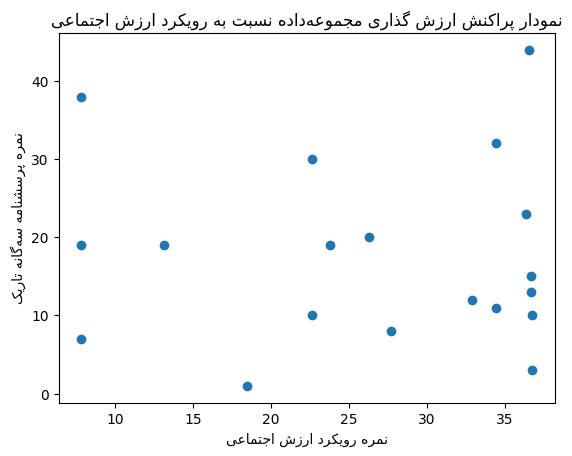

In [45]:
# PlotDF.rename(columns = {'SVOSliderTest.type':'SVO type'}, inplace = True)

SexualitySVOFigPersianTitle = 'نمودار پراکنش ارزش گذاری مجموعه‌داده نسبت به رویکرد ارزش اجتماعی'
SexualitySVOFigPersianTitleTitlereshaped_text = arabic_reshaper.reshape(
    SexualitySVOFigPersianTitle)
SexualitySVOFigPersianTitlebidi_text = get_display(
    SexualitySVOFigPersianTitleTitlereshaped_text)
plt.title(SexualitySVOFigPersianTitlebidi_text, fontsize=12)
# sns.countplot(x='SVO type', data=PlotDF)
var02_1 = 'نمره رویکرد ارزش اجتماعی'
var02_2 = arabic_reshaper.reshape(var02_1)
var02_3 = get_display(var02_2)
var03_1 = 'نمره پرسشنامه سه‌گانه تاریک'
var03_2 = arabic_reshaper.reshape(var03_1)
var03_3 = get_display(var03_2)
plt.xlabel(var02_3)
plt.ylabel(var03_3)
plt.scatter((SVOAndDTRNaNDroped[0:19].iloc[:,0]).astype(float), SVOAndDTRNaNDroped[0:19].iloc[:,1])
# plt.scatter(SVOAndDTRNaNDroped[0:19])
# list(SVOAndDTRNaNDroped.iloc[:,0].astype(float))
# list(SVOAndDTRNaNDroped.iloc[:,0])
# plt.show()

plt.savefig('../img/ScatterSVOScoreDarkTriadScore.pdf')

